# <font color=darkcyan>Analyze Clustering of Health and Wellness among Prasetiya Mulya Students using K-means, Gaussian Mixture Model, and Birch</font>

#### <font color=cadetblue>Felicia Austin (23102010007)<br>Felicita (23102010038)<br>Jonathan Evan Christian (23102010025)<br>Tri Yohana Ravika Munthe (23102010055)</font>

## <font color=palevioletred>**A. Background** </font>

Health is a crucial aspect of human life, and it can be assessed based on several specifications or indicators. Here are some factors that can be used to evaluate an individual's health quality:

1. Physical condition: Physical health is an important factor. It includes maintaining a healthy weight, a good level of physical fitness, muscular strength, the well-being of vital organs, and sufficient energy levels.

2. Nutrition and dietary patterns: Human beings require proper nutrition to operate optimally. A balanced diet that includes essential nutrients such as proteins, carbohydrates, healthy fats, vitamins, and minerals helps maintain overall health. However, excessive consumption of fast food, sugary drinks, or caffeine can have a negative impact on a person's health.

3. Sleep quality: Quality and adequate sleep are crucial for body recovery and rejuvenation. Having a good sleep routine can significantly influence overall health.

4. Lifestyle: An individual's lifestyle also affects their health. Engaging in unhealthy habits such as consuming alcohol and smoking can lower health quality, while taking appropriate vitamins can improve health quality.

These are some indicators used to assess an individual's health quality. However, it's important to remember that each person has unique health conditions, and health quality can vary from one individual to another. In summary, maintaining physical condition, following a balanced diet, getting quality sleep, and adopting a healthy lifestyle are essential for improving health quality.

## <font color=palevioletred>**B. Purpose** </font>

Maintaining good health is crucial for college students as it directly impacts their academic performance, stress management, immune system, overall quality of life, and long-term habits. By prioritizing their health, students can enhance their academic achievements, effectively manage stress, boost their immune system, improve their quality of life, and establish healthy habits for the future. Taking care of their health during college helps students optimize their potential and make the most out of their academic journey.

Through clustering analysis, we can identify the most influential health indicators. With this understanding, students can become more aware of their health and focus on important aspects such as diet, exercise, sleep, stress management, and mental health. This analysis helps increase awareness and promotes proactive actions towards health, assisting students in maintaining a balance between their studies, social life, and personal well-being.

## <font color=palevioletred>**C. Dataset Information** </font>

The dataset is taken from our group's conducted survey about prasmulyans' health and wellness, there are 19 questions ask, **15 variables** are going to be used for this research.

$x_1$: Age

$x_2$: Gender

$x_3$: Height (cm)

$x_4$: Weight (kg)

$x_5$: Fast food consumed per week

$x_6$: Sugary drinks (coke and boba tea) consumed per week

$x_7$: Servings of fruits and vegetables consumed per week

$x_8$: Workout time per week (hours)

$x_9$: Resting time including nap per day (hours)

$x_{10}$: Cigarettes smoked per day

$x_{11}$: Alcohol consumed per day (glass)

$x_{12}$: Heavy meals per day

$x_{13}$: Caffeinated drink consumed per day

$x_{14}$: Water consumed per day (litre)

$x_{15}$: Vitamins 

### <font color=pink> **Step 1: Import packages and classes** </font>

In [4]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # data visualization
import seaborn as sns
import scipy.stats as stats
from matplotlib import colors
from matplotlib.colors import ListedColormap
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import cluster, datasets, mixture
from sklearn.cluster import Birch
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.mixture import GaussianMixture 

### <font color=pink> **Step 2: Provide Data** </font>

In [5]:
df=pd.read_csv('Kelompok 4 - Intro to Data Science - Form Responses 1.csv')
df

Timestamp  Usia Jenis Kelamin  Tinggi badan (cm)  \
0     5/25/2023 9:56:53    21     Perempuan                170   
1    5/25/2023 14:44:35    21     Perempuan                154   
2    5/25/2023 16:03:26    20     Perempuan                153   
3    5/26/2023 10:06:18    21     Perempuan                156   
4    5/26/2023 10:06:44    20     Perempuan                168   
..                  ...   ...           ...                ...   
324   6/8/2023 17:35:48    21     Laki-laki                168   
325   6/8/2023 17:50:33    18     Perempuan                160   
326    6/9/2023 8:09:33    18     Perempuan                162   
327    6/9/2023 8:31:27    19     Laki-laki                167   
328    6/9/2023 8:36:22    21     Laki-laki                176   

     Berat badan (kg)  \
0                  60   
1                  48   
2                  48   
3                  45   
4                  55   
..                ...   
324                64   
325                49   
326                58   
327                62   
328                67   

     Dalam seminggu, berapa rata-rata porsi fast-food ataupun junk food (ayam goreng, burger, pizza) yang dikonsumsi?  \
0                                                    2                                                                  
1                                                    3                                                                  
2                                                    3                                                                  
3                                                    3                                                                  
4                                                    2                                                                  
..                                                 ...                                                                  
324                                                  4                                                                  
325                                                  3                                                                  
326                                                  2                                                                  
327                                                  4                                                                  
328                                                  6                                                                  

     Dalam seminggu, berapa rata-rata banyaknya gelas minuman manis seperti soda dan boba tea yang kamu konsumsi?  \
0                                                    0                                                              
1                                                    0                                                              
2                                                    0                                                              
3                                                    1                                                              
4                                                    1                                                              
..                                                 ...                                                              
324                                                  1                                                              
325                                                  0                                                              
326                                                  3                                                              
327                                                  3                                                              
328                                                  1                                                              

     Dalam seminggu, berapa rata-rata porsi buah dan sayur yan

### <font color=pink> **Step 3: Shape of Dataset** </font>

In [6]:
print('Number of rows:',df.shape[0])
print('Number of columns:',df.shape[1])

Number of rows: 329
Number of columns: 20


The dataset contains a survey from 330 respondents obtained within the time range of May 25, 2023, to June 9, 2023.

### <font color=pink> **Step 4: Information of Dataset** </font>

In [7]:
#checking number of null values in each column
pd.DataFrame(df.isnull().sum()).rename(columns={0:'null_values'}) #untuk memunculkan jumlah data yang kosong

null_values
Timestamp                                                     0
Usia                                                          0
Jenis Kelamin                                                 0
Tinggi badan (cm)                                             0
Berat badan (kg)                                              0
Dalam seminggu, berapa rata-rata porsi fast-foo...            0
Dalam seminggu, berapa rata-rata banyaknya gela...            0
Dalam seminggu, berapa rata-rata porsi buah dan...            0
Dalam seminggu, berapa rata-rata total jam kamu...            0
Dalam satu hari, berapa jam rata-rata jam waktu...            0
Dalam satu hari, berapa rata-rata batang rokok ...            0
Dalam seminggu, berapa rata-rata banyaknya gela...            0
Berapa rata-rata kamu makan berat per hari?                   0
Jurusan                                                       0
Angkatan                                                      0
Domisili asli                                                 0
Dalam seminggu, berapa rata-rata banyaknya cang...            0
Apakah Anda mahasiswa Universitas Prasetiya Mulya?            0
Dalam satu hari, berapa rata-rata banyaknya lit...            0
Apakah kamu mengonsumsi suplemen makanan atau v...            0

Based on the table above, the sum of null values in each column is 0. Meaning, there is no null value at this data frame.

In [8]:
#checking duplicate value
df.duplicated().sum()

0

There is no duplicate values appear in the dataframe.

In [9]:
#checking number of unique values
pd.DataFrame(df.nunique()).rename(columns={0:'unique_value'})

unique_value
Timestamp                                                    329
Usia                                                           6
Jenis Kelamin                                                  2
Tinggi badan (cm)                                             33
Berat badan (kg)                                              50
Dalam seminggu, berapa rata-rata porsi fast-foo...             9
Dalam seminggu, berapa rata-rata banyaknya gela...             6
Dalam seminggu, berapa rata-rata porsi buah dan...            13
Dalam seminggu, berapa rata-rata total jam kamu...            16
Dalam satu hari, berapa jam rata-rata jam waktu...             7
Dalam satu hari, berapa rata-rata batang rokok ...             7
Dalam seminggu, berapa rata-rata banyaknya gela...             9
Berapa rata-rata kamu makan berat per hari?                    6
Jurusan                                                       15
Angkatan                                                       4
Domisili asli                                                  7
Dalam seminggu, berapa rata-rata banyaknya cang...            11
Apakah Anda mahasiswa Universitas Prasetiya Mulya?             1
Dalam satu hari, berapa rata-rata banyaknya lit...            15
Apakah kamu mengonsumsi suplemen makanan atau v...             2

The number of unique value is listed above. The column with only 2 unique values, which are gender and vitamins, have binary options in the questionnaire. 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329 entries, 0 to 328
Data columns (total 20 columns):
 #   Column                                                                                                                                       Non-Null Count  Dtype  
---  ------                                                                                                                                       --------------  -----  
 0   Timestamp                                                                                                                                    329 non-null    object 
 1   Usia                                                                                                                                         329 non-null    int64  
 2   Jenis Kelamin                                                                                                                                329 non-null    object 
 3   Tinggi badan (cm)                       

In [11]:
df.head()

Timestamp  Usia Jenis Kelamin  Tinggi badan (cm)  \
0   5/25/2023 9:56:53    21     Perempuan                170   
1  5/25/2023 14:44:35    21     Perempuan                154   
2  5/25/2023 16:03:26    20     Perempuan                153   
3  5/26/2023 10:06:18    21     Perempuan                156   
4  5/26/2023 10:06:44    20     Perempuan                168   

   Berat badan (kg)  \
0                60   
1                48   
2                48   
3                45   
4                55   

   Dalam seminggu, berapa rata-rata porsi fast-food ataupun junk food (ayam goreng, burger, pizza) yang dikonsumsi?  \
0                                                  2                                                                  
1                                                  3                                                                  
2                                                  3                                                                  
3                                                  3                                                                  
4                                                  2                                                                  

   Dalam seminggu, berapa rata-rata banyaknya gelas minuman manis seperti soda dan boba tea yang kamu konsumsi?  \
0                                                  0                                                              
1                                                  0                                                              
2                                                  0                                                              
3                                                  1                                                              
4                                                  1                                                              

   Dalam seminggu, berapa rata-rata porsi buah dan sayur yang kamu konsumsi?  \
0                                                  1                           
1                                                  5                           
2                                                  7                           
3                                                  8                           
4                                                  5                           

   Dalam seminggu, berapa rata-rata total jam kamu berolahraga atau workout?  \
0                                                7.0                           
1                                                3.0                           
2                                                0.0                           
3                                                0.0                           
4                                                6.0                           

   Dalam satu hari, berapa jam rata-rata jam waktu tidur kamu (termasuk tidur siang)?  \
0                                                  9                                    
1                                                  9                                    
2                                                  5                                    
3                                                  7                                    
4                                                 10                                    

   Dalam satu hari, berapa rata-rata batang rokok yang kamu hisap?  \
0                                                  0                 
1                                                  0                 
2                                                  0                 
3                                                  0                 
4                                                  0                 

   Dalam seminggu, berapa rata-rata banyaknya gelas minuman beralkohol yang kamu konsumsi?  \
0                                                  0                  

In [12]:
df.tail()

Timestamp  Usia Jenis Kelamin  Tinggi badan (cm)  \
324  6/8/2023 17:35:48    21     Laki-laki                168   
325  6/8/2023 17:50:33    18     Perempuan                160   
326   6/9/2023 8:09:33    18     Perempuan                162   
327   6/9/2023 8:31:27    19     Laki-laki                167   
328   6/9/2023 8:36:22    21     Laki-laki                176   

     Berat badan (kg)  \
324                64   
325                49   
326                58   
327                62   
328                67   

     Dalam seminggu, berapa rata-rata porsi fast-food ataupun junk food (ayam goreng, burger, pizza) yang dikonsumsi?  \
324                                                  4                                                                  
325                                                  3                                                                  
326                                                  2                                                                  
327                                                  4                                                                  
328                                                  6                                                                  

     Dalam seminggu, berapa rata-rata banyaknya gelas minuman manis seperti soda dan boba tea yang kamu konsumsi?  \
324                                                  1                                                              
325                                                  0                                                              
326                                                  3                                                              
327                                                  3                                                              
328                                                  1                                                              

     Dalam seminggu, berapa rata-rata porsi buah dan sayur yang kamu konsumsi?  \
324                                                  7                           
325                                                  5                           
326                                                  8                           
327                                                 11                           
328                                                  1                           

     Dalam seminggu, berapa rata-rata total jam kamu berolahraga atau workout?  \
324                                                3.0                           
325                                                1.0                           
326                                                1.0                           
327                                                2.0                           
328                                                2.0                           

     Dalam satu hari, berapa jam rata-rata jam waktu tidur kamu (termasuk tidur siang)?  \
324                                                  7                                    
325                                                  7                                    
326                                                  5                                    
327                                                  7                                    
328                                                  6                                    

     Dalam satu hari, berapa rata-rata batang rokok yang kamu hisap?  \
324                                                  5                 
325                                                  1                 
326                                                  0                 
327                                                  1                 
328                                                  5                 

     Dalam seminggu, berapa rata-rata banyaknya gelas minuman beralkohol ya

## <font color=palevioletred>**D. Data Engineering** </font>

Next, data cleaning will be performed, where first and foremost we will remove unused columns such as the timestamp column. Then, since this research is specifically focused on Prasetiya Mulya University students, we will select respondents who are students of Prasetiya Mulya University. After that, column names will also be changed to facilitate future analysis and categorical columns will be converted into numeric ones. Lastly, outliers will be removed before conducting Explanatory Data Analysis.

### <font color=pink> **Step 1: Data Cleaning** </font>

In [13]:
#remove unwanted columns
df.drop('Timestamp',inplace=True, axis=1)

In [14]:
#since the research is solely for prasmulyans, other students from different university should be removed
df=df[df['Apakah Anda mahasiswa Universitas Prasetiya Mulya?']=='Ya']
df.drop('Apakah Anda mahasiswa Universitas Prasetiya Mulya?',inplace=True,axis=1)

In [15]:
#rename column
df=df.rename(columns={'Usia':'age','Jenis Kelamin':'gender','Tinggi badan (cm)':'height','Berat badan (kg)':'weight',
                     'Dalam seminggu, berapa rata-rata porsi fast-food ataupun junk food (ayam goreng, burger, pizza) yang dikonsumsi?':'fastfood_consumed',
                     'Dalam seminggu, berapa rata-rata banyaknya gelas minuman manis seperti soda dan boba tea yang kamu konsumsi?':'sugary_drinks',
                     'Dalam seminggu, berapa rata-rata porsi buah dan sayur yang kamu konsumsi?':'fruits_vegetables',
                     'Dalam seminggu, berapa rata-rata total jam kamu berolahraga atau workout?':'exercise',
                     'Dalam satu hari, berapa jam rata-rata jam waktu tidur kamu (termasuk tidur siang)?':'resting',
                     'Dalam satu hari, berapa rata-rata batang rokok yang kamu hisap?':'smoking',
                     'Dalam seminggu, berapa rata-rata banyaknya gelas minuman beralkohol yang kamu konsumsi?':'alcohol_consumed',
                     'Berapa rata-rata kamu makan berat per hari?':'meals',
                     'Jurusan':'major','Angkatan':'year','Domisili Asli':'origin',
                     'Dalam seminggu, berapa rata-rata banyaknya cangkir kopi atau minuman berkafein (minuman bersoda, minuman berenergi, dan teh) kamu konsumsi?':'caffeinated_drinks',
                     'Dalam satu hari, berapa rata-rata banyaknya liter air putih kamu konsumsi?':'water_consumed',
                     'Apakah kamu mengonsumsi suplemen makanan atau vitamin dalam seminggu terakhir?':'vitamins'})
df

age     gender  height  weight  fastfood_consumed  sugary_drinks  \
0     21  Perempuan     170      60                  2              0   
1     21  Perempuan     154      48                  3              0   
2     20  Perempuan     153      48                  3              0   
3     21  Perempuan     156      45                  3              1   
4     20  Perempuan     168      55                  2              1   
..   ...        ...     ...     ...                ...            ...   
324   21  Laki-laki     168      64                  4              1   
325   18  Perempuan     160      49                  3              0   
326   18  Perempuan     162      58                  2              3   
327   19  Laki-laki     167      62                  4              3   
328   21  Laki-laki     176      67                  6              1   

     fruits_vegetables  exercise  resting  smoking  alcohol_consumed  meals  \
0                    1       7.0        9        0                 0    1.5   
1                    5       3.0        9        0                 0    1.5   
2                    7       0.0        5        0                 0    1.5   
3                    8       0.0        7        0                 2    2.0   
4                    5       6.0       10        0                 0    2.0   
..                 ...       ...      ...      ...               ...    ...   
324                  7       3.0        7        5                 1    2.5   
325                  5       1.0        7        1                 0    3.0   
326                  8       1.0        5        0                 3    1.0   
327                 11       2.0        7        1                 1    1.0   
328                  1       2.0        6        5                 0    2.0   

                                  major  year              Domisili asli  \
0           STEM - Business Mathematics  2020  Jawa (selain Jabodetabek)   
1           STEM - Business Mathematics  2020  Jawa (selain Jabodetabek)   
2           STEM - Business Mathematics  2020                Jabodetabek   
3           STEM - Business Mathematics  2020     Bali dan Nusa Tenggara   
4           STEM - Business Mathematics  2020  Jawa (selain Jabodetabek)   
..                                  ...   ...                        ...   
324  STEM - Computer System Engineering  2020                Jabodetabek   
325                    SBE - Accounting  2021                Jabodetabek   
326         STEM - Business Mathematics  2021     Bali dan Nusa Tenggara   
327         STEM - Business Mathematics  2021  Jawa (selain Jabodetabek)   
328            SBE - Business Economics  2020  Jawa (selain Jabodetabek)   

     caffeinated_drinks  water_consumed vitamins  
0                     2             2.5    Tidak  
1                     2             8.0       Ya  
2                     0             3.0       Ya  
3                     5             1.0       Ya  
4                     1             3.0       Ya  
..                  ...             ...      ...  
324                   3             3.0    Tidak  
325                   0             3.0    Tidak  
326                   1             3.0    Tidak  
327                   1             3.0       Ya  
328                   4             4.0       Ya  

[329 rows x 18 columns]

In [16]:
#changing data in vitamins column into 1: 'Ya' and 0:"Tidak"
df.loc[df.vitamins=='Tidak','vitamins']=0
df.loc[df.vitamins=='Ya','vitamins']=1

In [17]:
#Checking duplicate data
df.duplicated().sum()

0

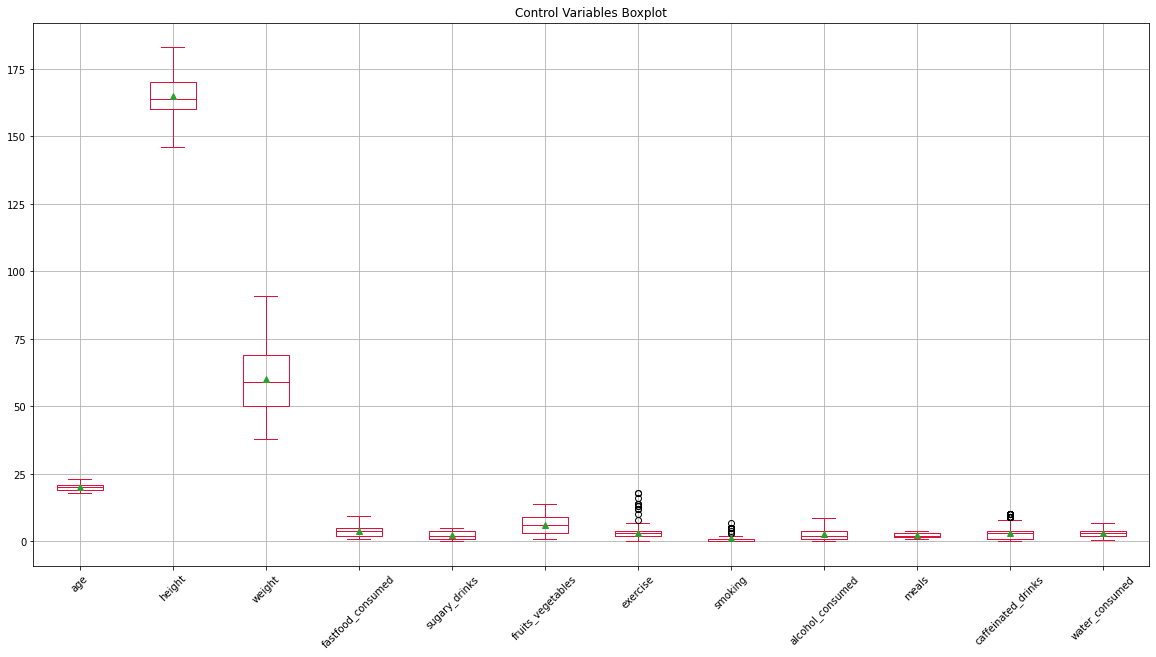

In [23]:
fig, ax = plt.subplots(figsize=(20, 10))
boxplot = df[['age', 'height', 'weight', 'fastfood_consumed', 'sugary_drinks', 'fruits_vegetables', 'exercise', 'smoking', 'alcohol_consumed', 'meals', 'caffeinated_drinks', 'water_consumed']].boxplot(showmeans=True, rot=45, color='crimson', ax=ax)
plt.title('Control Variables Boxplot')
plt.show()

Based on the above boxplot, we can observe that there are a few outliers in fastfood_consumed, alcohol_consumed, and water_consumed variables, which may not be valid and can skew those variables. However, for exercise, smoking, and caffeinated_drinks, we can see that there are quite a few outliers, indicating a considerable variation in these variables.

In [24]:
#handling outliers using Quantile based flooring and capping
#only variabel fastfood_cosnumed, alchol_consumed,water_consumed
var=['fastfood_consumed','alcohol_consumed','water_consumed']
def outliers(var):
    for i in var:
        Q1=df[i].quantile(0.25)
        Q3=df[i].quantile(0.75)
        IQR=Q3-Q1
        df[i]=np.where((df[i] < (Q1 - 1.5 * IQR)),(Q1 - 1.5 * IQR),df[i])
        df[i]=np.where((df[i] > (Q3 + 1.5 * IQR)),(Q3 + 1.5 * IQR),df[i])
outliers(var)

### <font color=pink> **Step 2: Introducing New Metrics** </font>

In [25]:
#Body Mass Index
df['bmi']=df.weight/((df.height/100)**2)
df

age     gender  height  weight  fastfood_consumed  sugary_drinks  \
0     21  Perempuan     170      60                2.0              0   
1     21  Perempuan     154      48                3.0              0   
2     20  Perempuan     153      48                3.0              0   
3     21  Perempuan     156      45                3.0              1   
4     20  Perempuan     168      55                2.0              1   
..   ...        ...     ...     ...                ...            ...   
324   21  Laki-laki     168      64                4.0              1   
325   18  Perempuan     160      49                3.0              0   
326   18  Perempuan     162      58                2.0              3   
327   19  Laki-laki     167      62                4.0              3   
328   21  Laki-laki     176      67                6.0              1   

     fruits_vegetables  exercise  resting  smoking  alcohol_consumed  meals  \
0                    1       7.0        9        0               0.0    1.5   
1                    5       3.0        9        0               0.0    1.5   
2                    7       0.0        5        0               0.0    1.5   
3                    8       0.0        7        0               2.0    2.0   
4                    5       6.0       10        0               0.0    2.0   
..                 ...       ...      ...      ...               ...    ...   
324                  7       3.0        7        5               1.0    2.5   
325                  5       1.0        7        1               0.0    3.0   
326                  8       1.0        5        0               3.0    1.0   
327                 11       2.0        7        1               1.0    1.0   
328                  1       2.0        6        5               0.0    2.0   

                                  major  year              Domisili asli  \
0           STEM - Business Mathematics  2020  Jawa (selain Jabodetabek)   
1           STEM - Business Mathematics  2020  Jawa (selain Jabodetabek)   
2           STEM - Business Mathematics  2020                Jabodetabek   
3           STEM - Business Mathematics  2020     Bali dan Nusa Tenggara   
4           STEM - Business Mathematics  2020  Jawa (selain Jabodetabek)   
..                                  ...   ...                        ...   
324  STEM - Computer System Engineering  2020                Jabodetabek   
325                    SBE - Accounting  2021                Jabodetabek   
326         STEM - Business Mathematics  2021     Bali dan Nusa Tenggara   
327         STEM - Business Mathematics  2021  Jawa (selain Jabodetabek)   
328            SBE - Business Economics  2020  Jawa (selain Jabodetabek)   

     caffeinated_drinks  water_consumed vitamins        bmi  
0                     2             2.5        0  20.761246  
1                     2             7.0        1  20.239501  
2                     0             3.0        1  20.504934  
3                     5             1.0        1  18.491124  
4                     1             3.0        1  19.486961  
..                  ...             ...      ...        ...  
324                   3             3.0        0  22.675737  
325                   0             3.0        0  19.140625  
326                   1             3.0        0  22.100290  
327                   1             3.0        1  22.230987  
328                   4             4.0        1  21.629649  

[329 rows x 19 columns]

In [26]:
#Exercise to Sleep Ratio
df['ets']=(df.exercise/7)/df.resting
df

age     gender  height  weight  fastfood_consumed  sugary_drinks  \
0     21  Perempuan     170      60                2.0              0   
1     21  Perempuan     154      48                3.0              0   
2     20  Perempuan     153      48                3.0              0   
3     21  Perempuan     156      45                3.0              1   
4     20  Perempuan     168      55                2.0              1   
..   ...        ...     ...     ...                ...            ...   
324   21  Laki-laki     168      64                4.0              1   
325   18  Perempuan     160      49                3.0              0   
326   18  Perempuan     162      58                2.0              3   
327   19  Laki-laki     167      62                4.0              3   
328   21  Laki-laki     176      67                6.0              1   

     fruits_vegetables  exercise  resting  smoking  alcohol_consumed  meals  \
0                    1       7.0        9        0               0.0    1.5   
1                    5       3.0        9        0               0.0    1.5   
2                    7       0.0        5        0               0.0    1.5   
3                    8       0.0        7        0               2.0    2.0   
4                    5       6.0       10        0               0.0    2.0   
..                 ...       ...      ...      ...               ...    ...   
324                  7       3.0        7        5               1.0    2.5   
325                  5       1.0        7        1               0.0    3.0   
326                  8       1.0        5        0               3.0    1.0   
327                 11       2.0        7        1               1.0    1.0   
328                  1       2.0        6        5               0.0    2.0   

                                  major  year              Domisili asli  \
0           STEM - Business Mathematics  2020  Jawa (selain Jabodetabek)   
1           STEM - Business Mathematics  2020  Jawa (selain Jabodetabek)   
2           STEM - Business Mathematics  2020                Jabodetabek   
3           STEM - Business Mathematics  2020     Bali dan Nusa Tenggara   
4           STEM - Business Mathematics  2020  Jawa (selain Jabodetabek)   
..                                  ...   ...                        ...   
324  STEM - Computer System Engineering  2020                Jabodetabek   
325                    SBE - Accounting  2021                Jabodetabek   
326         STEM - Business Mathematics  2021     Bali dan Nusa Tenggara   
327         STEM - Business Mathematics  2021  Jawa (selain Jabodetabek)   
328            SBE - Business Economics  2020  Jawa (selain Jabodetabek)   

     caffeinated_drinks  water_consumed vitamins        bmi       ets  
0                     2             2.5        0  20.761246  0.111111  
1                     2             7.0        1  20.239501  0.047619  
2                     0             3.0        1  20.504934  0.000000  
3                     5             1.0        1  18.491124  0.000000  
4                     1             3.0        1  19.486961  0.085714  
..                  ...             ...      ...        ...       ...  
324                   3             3.0        0  22.675737  0.061224  
325                   0             3.0        0  19.140625  0.020408  
326                   1             3.0        0  22.100290  0.028571  
327                   1             3.0        1  22.230987  0.040816  
328                   4             4.0        1  21.629649  0.047619  

[329 rows x 20 columns]

## <font color=palevioletred>**E. Explanatory Data Analysis** </font>

### <font color=pink> **Step 1: Data Summary** </font>

In [27]:
print("Total categories in the Age:\n", df["age"].value_counts(), "\n")
print("Total categories in the Year:\n", df["year"].value_counts(),"\n")
print("Total categories in the Major:\n", df["major"].value_counts())

Total categories in the Age:
 21    88
19    64
20    63
18    60
22    53
23     1
Name: age, dtype: int64 

Total categories in the Year:
 2020    125
2021     88
2022     64
2019     52
Name: year, dtype: int64 

Total categories in the Major:
 STEM - Business Mathematics            101
SBE - Business                          70
SBE - Branding                          25
SBE - Accounting                        22
SBE - Business Economics                19
STEM - Food Business Technology         14
SBE - Financial Technology              12
SBE - Hospitality Business              11
SBE - Finance and Banking               11
STEM - Computer System Engineering      10
STEM - Software Engineering              8
STEM - Renewable Energy Engineering      7
SBE - International Business Law         7
STEM - Product Design Engineering        6
SBE - Event                              6
Name: major, dtype: int64


In [28]:
df.describe()

age      height      weight  fastfood_consumed  sugary_drinks  \
count  329.000000  329.000000  329.000000         329.000000     329.000000   
mean    20.039514  164.866261   60.079027           3.986322       2.382979   
std      1.366505    6.772459   11.464413           2.012301       1.543816   
min     18.000000  146.000000   38.000000           1.000000       0.000000   
25%     19.000000  160.000000   50.000000           2.000000       1.000000   
50%     20.000000  164.000000   59.000000           4.000000       2.000000   
75%     21.000000  170.000000   69.000000           5.000000       4.000000   
max     23.000000  183.000000   91.000000           9.500000       5.000000   

       fruits_vegetables    exercise     resting     smoking  \
count         329.000000  329.000000  329.000000  329.000000   
mean            6.142857    3.176292    6.291793    1.161094   
std             3.424395    2.541890    1.514149    1.808232   
min             1.000000    0.000000    4.000000    0.000000   
25%             3.000000    2.000000    5.000000    0.000000   
50%             6.000000    3.000000    6.000000    0.000000   
75%             9.000000    4.000000    7.000000    1.000000   
max            14.000000   18.000000   10.000000    7.000000   

       alcohol_consumed       meals         year  caffeinated_drinks  \
count        329.000000  329.000000   329.000000          329.000000   
mean           2.624620    2.244681  2020.498480            3.279635   
std            2.231216    0.914906     0.978814            2.417084   
min            0.000000    1.000000  2019.000000            0.000000   
25%            1.000000    1.500000  2020.000000            1.000000   
50%            2.000000    2.000000  2020.000000            3.000000   
75%            4.000000    3.000000  2021.000000            4.000000   
max            8.500000    4.000000  2022.000000           10.000000   

       water_consumed         bmi         ets  
count      329.000000  329.000000  329.000000  
mean         3.093465   21.944433    0.077558  
std          0.865547    2.943201    0.073622  
min          0.500000   15.031051    0.000000  
25%          2.000000   19.721037    0.040816  
50%          3.000000   22.071078    0.071429  
75%          4.000000   23.836735    0.085714  
max          7.000000   29.065744    0.642857

From the table above, we can see that the respondents who filled out the questionnaire are aged between 18-23 years, from the batches of 2019-2022. On average, Prasetiya Mulya University students consume heavy meals twice a day, and they consume junk food and fast food an average of 4 times per week, with all respondents purchasing junk food or fast food at least once. This indicates that an average of 28.5% of the food consumed by Prasetiya Mulya University students consists of junk food and fast food within a week. However, the consumption of vegetables and fruits is relatively high, with students consuming them an average of 6 times per week, surpassing the consumption of junk food. On the other hand, the consumption of sweetened and caffeinated drinks is quite high, with students consuming an average of 5.5 glasses per week. Although it is still considered insufficient, Prasetiya Mulya University students have an average of 6 hours of rest time per day, which is relatively high. Just like the slogan of Prasetiya Mulya University, which is a smoke-free campus, the average number of cigarettes smoked by students is relatively low, at 1 stick, suggesting that many Prasetiya Mulya University students do not smoke.

In [29]:
#calculating trim mean of control_group
#Trimmed mean is a method of averaging that removes a small percentage of the largest and smallest values before calculating the mean
pd.DataFrame(stats.trim_mean(df[['age','height','weight','fastfood_consumed','sugary_drinks','fruits_vegetables','exercise','smoking','alcohol_consumed','meals','caffeinated_drinks','water_consumed']],0.1)).rename(index={
    0:'age',1:'height',2:'weight',3:'fastfood_consumed',4:'sugary_drinks',5:'fruits_vegetables',6:'exercise',7:'smoking',8:'alcohol_consumed',9:'meals',10:'caffeinated_drinks',11:'water_consumed'},
                                                              columns={0:'trim_mean'})

trim_mean
age                  20.045283
height              164.833962
weight               59.524528
fastfood_consumed     3.913208
sugary_drinks         2.369811
fruits_vegetables     6.090566
exercise              2.864151
smoking               0.830189
alcohol_consumed      2.475472
meals                 2.183019
caffeinated_drinks    3.018868
water_consumed        3.106415

### <font color=pink> **Step 2: Data Visualisation** </font>

Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 432x288 with 0 Axes>

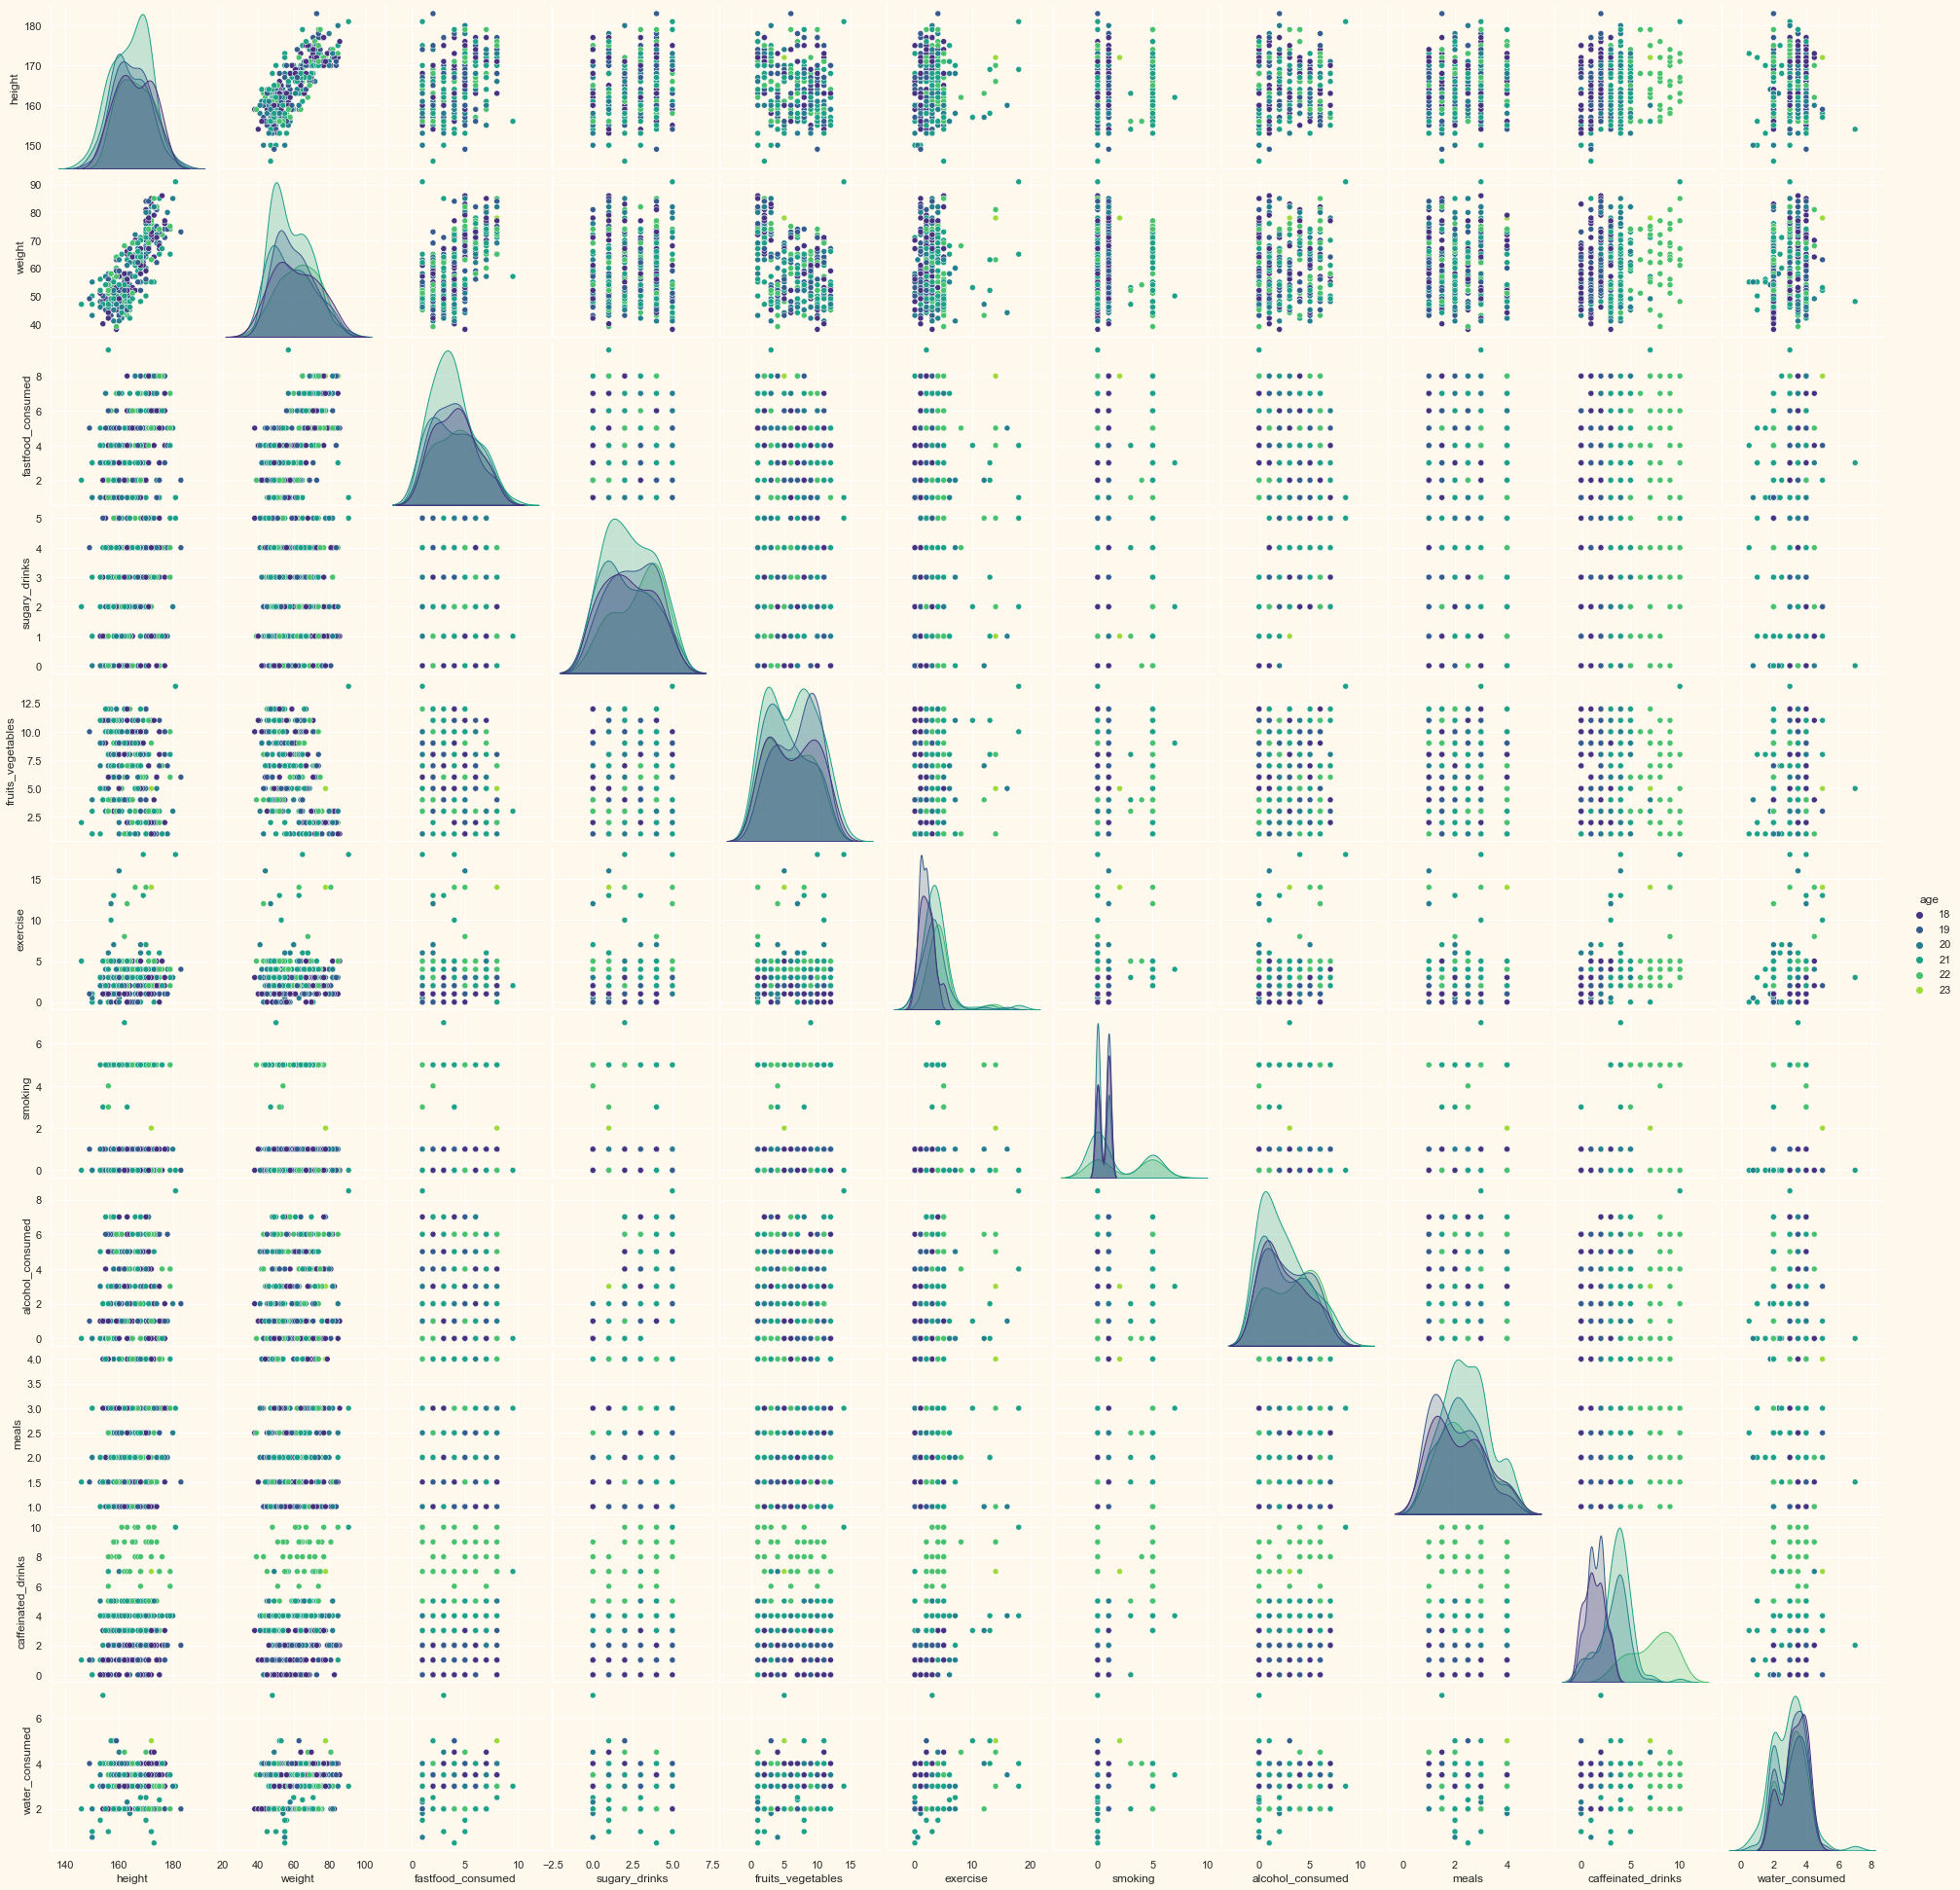

In [30]:
#To plot some selected features 
#Setting up colors prefrences
pal = "viridis"
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
#Plotting following features
To_Plot = ["age","height","weight","fastfood_consumed","sugary_drinks","fruits_vegetables","exercise","smoking","alcohol_consumed","meals","caffeinated_drinks","water_consumed"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(df[To_Plot], hue="age",palette=sns.color_palette(pal)[:6])
#Taking hue 
plt.show()

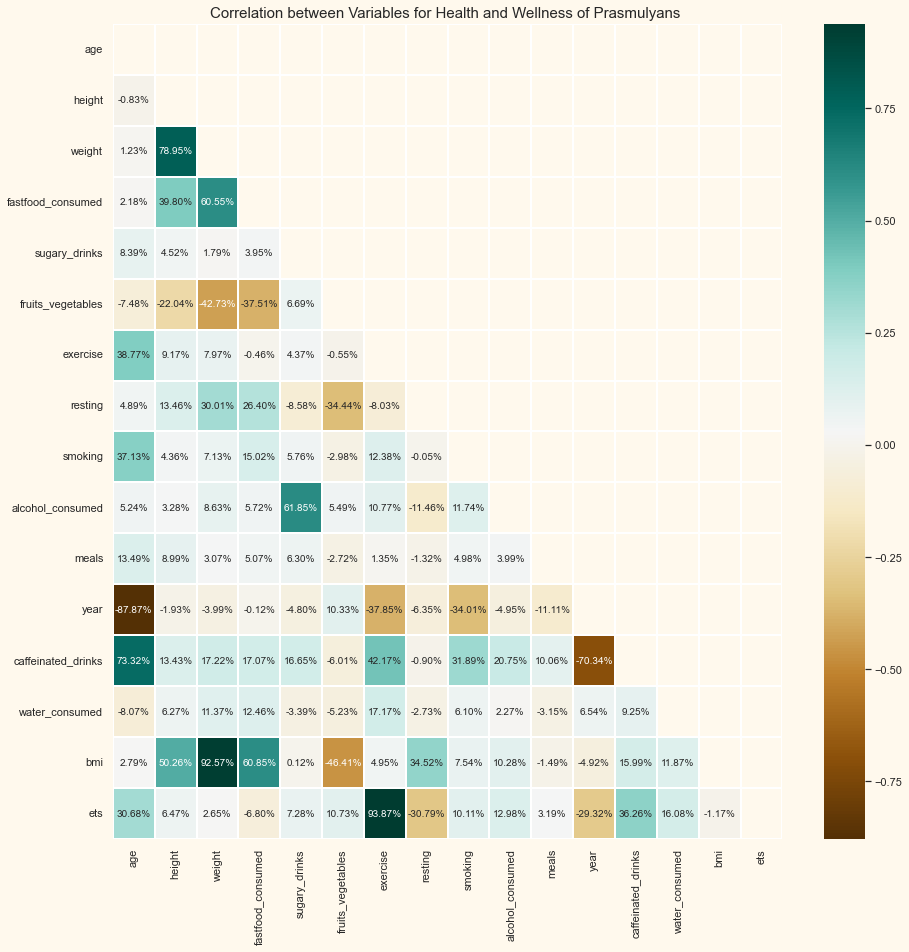

In [31]:
plt.figure(figsize=(15,15))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
sns.heatmap(df.corr(),annot=True,fmt='.2%', mask=mask,annot_kws={'size':10},linewidth=0.07, 
            cmap='BrBG')
plt.title("Correlation between Variables for Health and Wellness of Prasmulyans ",size=15)
plt.show()

Based on the correlation between variables, there is a strong positive correlation between height and weight, indicating that as a person's height increases, their weight also tends to increase. Similarly, there is a strong positive correlation between age and the consumption of caffeinated drinks, implying that as a person gets older, they tend to consume caffeinated beverages more frequently. This is particularly true for senior students who are in the final semester and are struggling with their thesis, as they may need a boost to stay refreshed and alert.

In [32]:
df.groupby('gender').mean()

age      height     weight  fastfood_consumed  sugary_drinks  \
gender                                                                          
Laki-laki  20.088608  170.392405  70.069620            5.06962       2.468354   
Perempuan  19.994152  159.760234  50.847953            2.98538       2.304094   

           fruits_vegetables  exercise   resting   smoking  alcohol_consumed  \
gender                                                                         
Laki-laki           5.113924  3.401899  6.620253  1.316456          2.781646   
Perempuan           7.093567  2.967836  5.988304  1.017544          2.479532   

              meals         year  caffeinated_drinks  water_consumed  \
gender                                                                 
Laki-laki  2.287975  2020.430380            3.708861        3.182911   
Perempuan  2.204678  2020.561404            2.883041        3.010819   

                 bmi       ets  
gender                          
Laki-laki  24.110012  0.080990  
Perempuan  19.943489  0.074387

The average age of the respondence is 20 for both genders. Their mean height is 170 cm and 160 cm for boys and girls respectively, while their weight is 70kg and 51 kg. Boys have hgiher mean time for both exercising and resting time. Other variables such as sugary drinks, smoking, alcohol consumption, and meals are similar in both cases.

In [33]:
df.groupby('gender').count()[['age']].rename(columns={'age':'Count'})

Count
gender          
Laki-laki    158
Perempuan    171

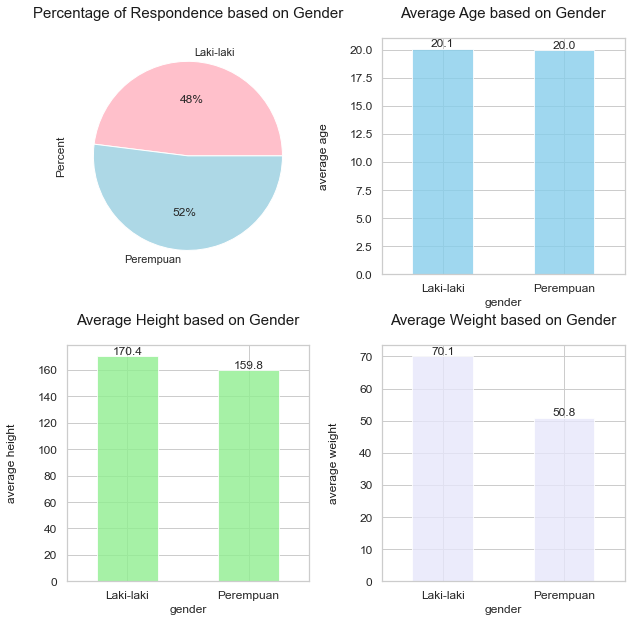

In [39]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
Count = df.groupby('gender').count()[['age']]
gender = df.groupby('gender').mean()
Count['Percent'] = (Count.age / Count.age.sum()) * 100
Count['Percent'].plot(kind="pie", y='Percent', autopct='%1.0f%%', ax=ax[0, 0], colors=['pink', 'lightblue'])
gender['age'].plot(kind="bar", color='skyblue', alpha=0.8, fontsize=12, ax=ax[0, 1])
gender['height'].plot(kind="bar", color='lightgreen', alpha=0.8, fontsize=12, ax=ax[1, 0])
gender['weight'].plot(kind="bar", color='lavender', alpha=0.8, fontsize=12, ax=ax[1, 1])

ax[0, 1].tick_params(labelrotation=0)
ax[1, 0].tick_params(labelrotation=0)
ax[1, 1].tick_params(labelrotation=0)
ax[0, 1].set_ylabel("average age", fontsize=12, color="k", labelpad=20, ha="center")
ax[1, 0].set_ylabel("average height", fontsize=12, color="k", labelpad=20, ha="center")
ax[1, 1].set_ylabel("average weight", fontsize=12, color="k", labelpad=20, ha="center")

ax[0, 1].bar_label(ax[0, 1].containers[0], fmt='%.1f')
ax[1, 0].bar_label(ax[1, 0].containers[0], fmt='%.1f')
ax[1, 1].bar_label(ax[1, 1].containers[0], fmt='%.1f')

ax[0, 0].set_title("Percentage of Respondence based on Gender", fontsize=15, color="k", pad=20)
ax[0, 1].set_title("Average Age based on Gender", fontsize=15, color="k", pad=20)
ax[1, 0].set_title("Average Height based on Gender", fontsize=15, color="k", pad=20)
ax[1, 1].set_title("Average Weight based on Gender", fontsize=15, color="k", pad=20)

plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

This survey has more female respondents (52%) than male respondents (48%) with an average age of 20 years for both males and females. On average, male respondents have a height of around 165cm and a weight of around 70kg, while female respondents have an average height of around 160cm and a weight of around 50kg.

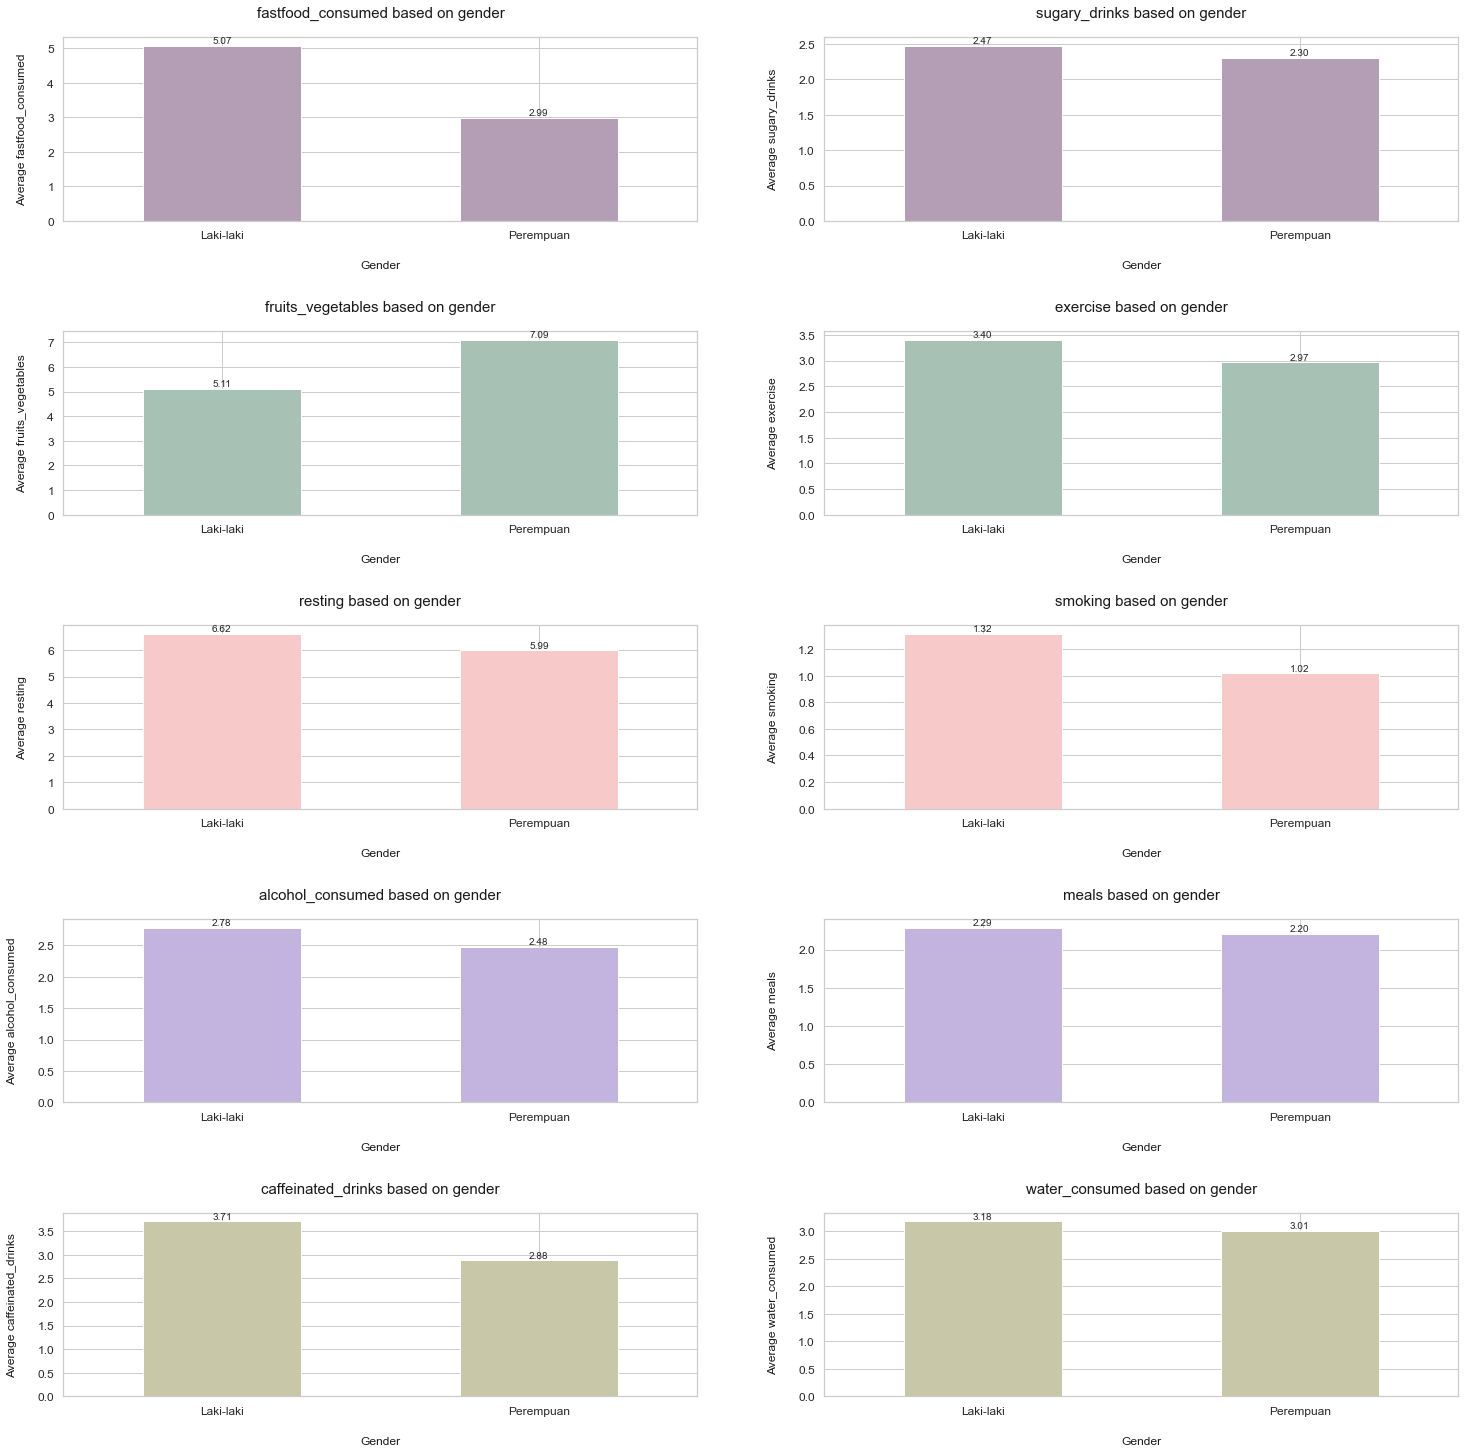

In [42]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(5, 2, figsize=(25, 25))
gender = df.groupby('gender').mean()
var = ['fastfood_consumed', 'sugary_drinks', 'fruits_vegetables', 'exercise', 'resting', 'smoking',
       'alcohol_consumed', 'meals', 'caffeinated_drinks', 'water_consumed']
colors = ['#B39EB5', '#A7C1B4', '#F7CAC9', '#C2B4DE', '#C8C8A9', '#F5D0C1', '#CFCFC4', '#FFD1DC']

for i in range(len(var)):
    if i % 2 == 0:
        x = 0
    else:
        x = 1
    gender[var[i]].plot(kind="bar", color=colors[i // 2], alpha=1, fontsize=12, ax=ax[i // 2, x])
    ax[i // 2, x].tick_params(labelrotation=0)
    ax[i // 2, x].set_xlabel("Gender", fontsize=12, color="k", labelpad=20, ha="center")
    ax[i // 2, x].set_ylabel("Average " + var[i], fontsize=12, color="k", labelpad=20, ha="center")
    ax[i // 2, x].set_title(var[i] + " based on gender", fontsize=15, color="k", pad=20)
    
    # Display numerical values on the bar plots
    for p in ax[i // 2, x].patches:
        ax[i // 2, x].annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                               ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=10)

plt.subplots_adjust(wspace=0.2, hspace=0.6)
plt.show()

From the above graph, it can be seen that, on average, female students have a healthier lifestyle compared to male students. Female students consume more vegetables and fruits, and they consume less junk food, sugary drinks, and alcohol. Additionally, a smaller percentage of female students smoke compared to male students.

In [43]:
df.groupby('age').mean()

height     weight  fastfood_consumed  sugary_drinks  \
age                                                            
18   165.683333  61.283333           4.100000       2.216667   
19   165.140625  59.953125           3.921875       2.468750   
20   163.603175  58.587302           3.841270       2.126984   
21   164.215909  58.693182           3.846591       2.340909   
22   166.056604  62.603774           4.264151       2.867925   
23   172.000000  78.000000           8.000000       1.000000   

     fruits_vegetables   exercise   resting   smoking  alcohol_consumed  \
age                                                                       
18            6.350000   2.083333  6.283333  0.566667          2.533333   
19            6.906250   1.843750  6.046875  0.609375          2.734375   
20            5.428571   3.365079  6.365079  0.349206          2.365079   
21            6.227273   3.897727  6.352273  1.738636          2.414773   
22            5.716981   4.396226  6.433962  2.490566          3.245283   
23            5.000000  14.000000  5.000000  2.000000          3.000000   

        meals         year  caffeinated_drinks  water_consumed        bmi  \
age                                                                         
18   2.158333  2021.500000            1.333333        3.283333  22.123941   
19   1.976562  2021.484375            1.515625        3.179688  21.850563   
20   2.269841  2020.476190            3.174603        2.965873  21.700338   
21   2.420455  2020.011364            3.602273        2.947727  21.641698   
22   2.311321  2019.037736            7.132075        3.132075  22.563954   
23   4.000000  2019.000000            7.000000        5.000000  26.365603   

          ets  
age            
18   0.051289  
19   0.048349  
20   0.081643  
21   0.095683  
22   0.101533  
23   0.400000

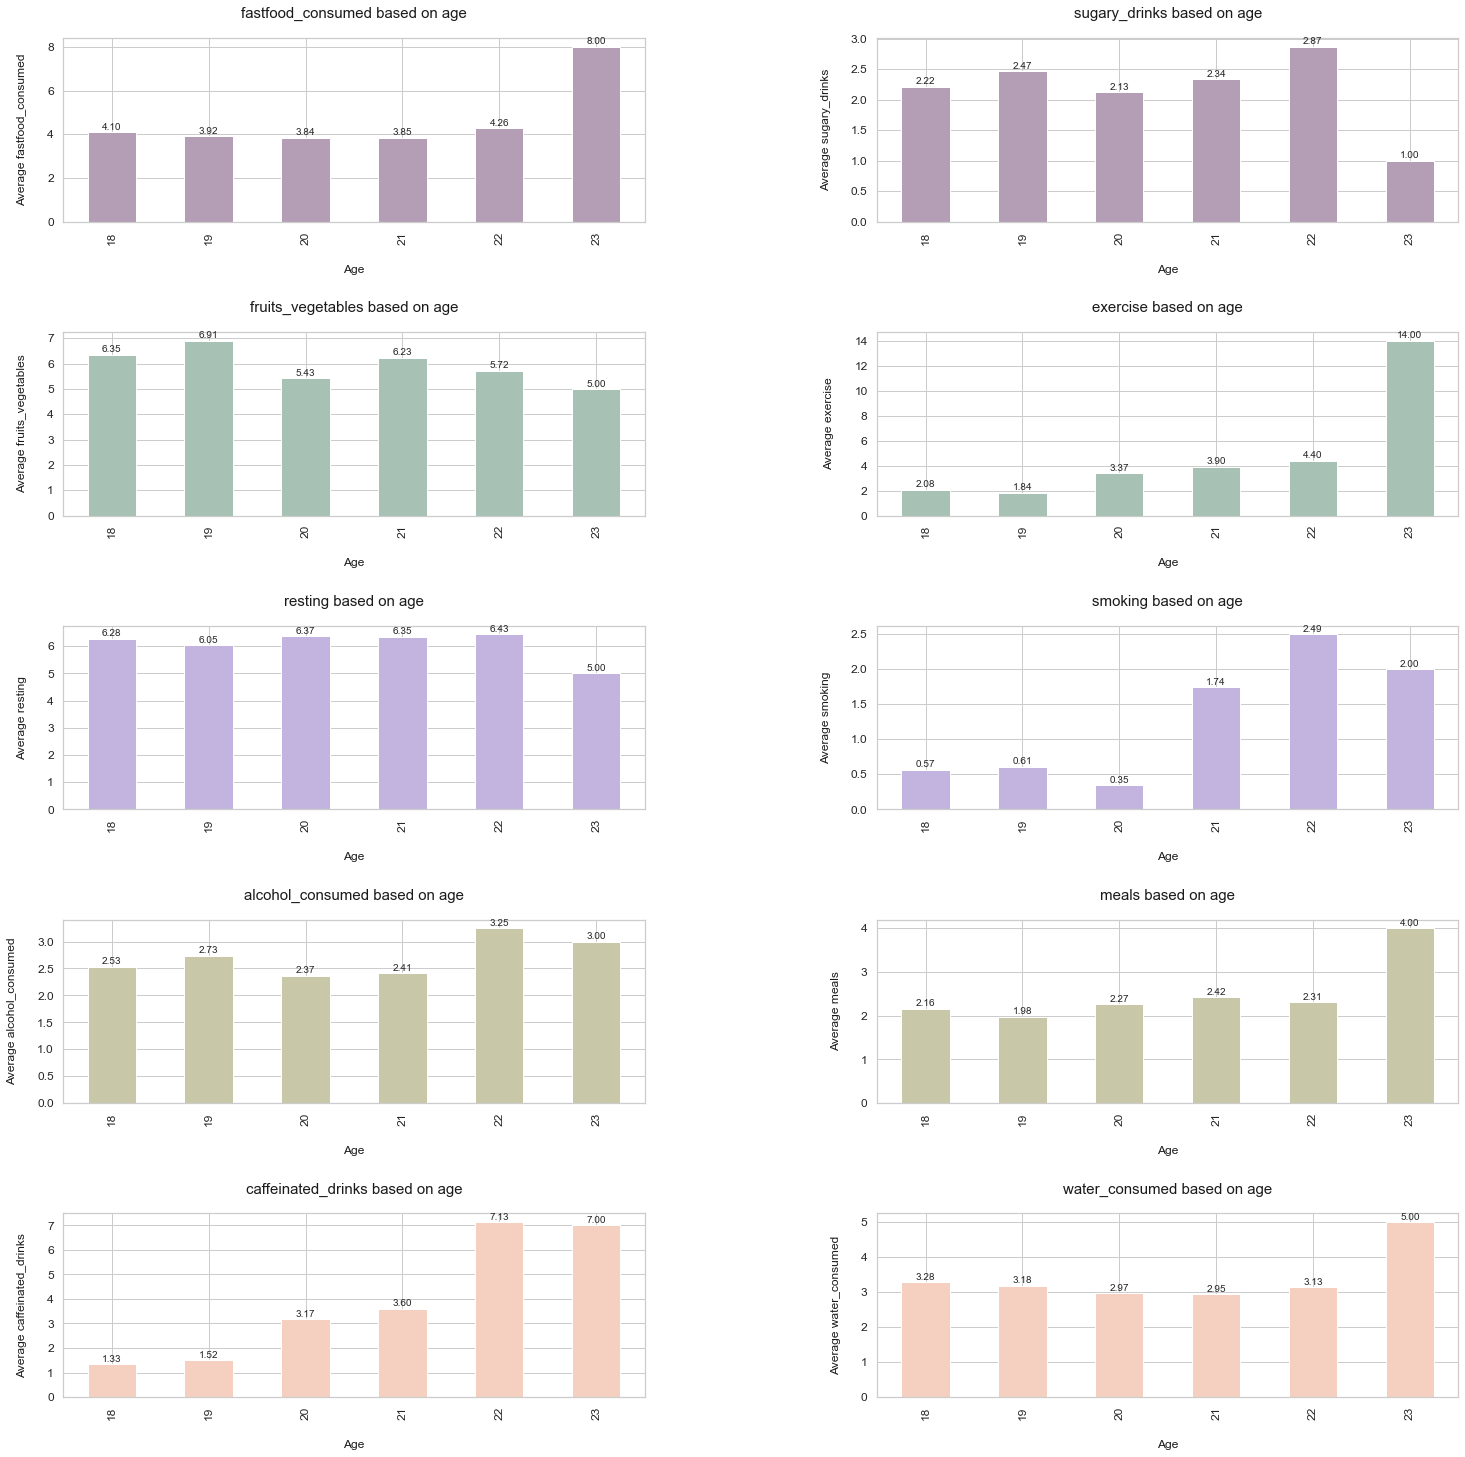

In [44]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(5, 2, figsize=(25, 25))
age = df.groupby('age').mean()
var = ['fastfood_consumed', 'sugary_drinks', 'fruits_vegetables', 'exercise', 'resting', 'smoking',
       'alcohol_consumed', 'meals', 'caffeinated_drinks', 'water_consumed']
colors = ['#B39EB5', '#A7C1B4', '#C2B4DE', '#C8C8A9', '#F5D0C1', '#FFD1DC', '#F7CAC9', '#CFCFC4', '#F5D0C1', '#C8C8A9']

for i in range(len(var)):
    if i % 2 == 0:
        x = 0
    else:
        x = 1
    age[var[i]].plot(kind="bar", color=colors[i // 2], alpha=1, fontsize=12, ax=ax[i // 2, x])
    ax[i // 2, x].set_xlabel("Age", fontsize=12, color="k", labelpad=20, ha="center")
    ax[i // 2, x].set_ylabel("Average " + var[i], fontsize=12, color="k", labelpad=20, ha="center")
    ax[i // 2, x].set_title(var[i] + " based on age", fontsize=15, color="k", pad=20)
    
    # Display numerical values on the bar plots
    for p in ax[i // 2, x].patches:
        ax[i // 2, x].annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                               ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=10)

plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.show()

In the above bar plot, it can be observed that on average, Prasetiya Mulya University students aged 18-22 tend to consume caffeinated drinks more frequently as they get older. However, it is also noticeable that their exercise time increases as they age.

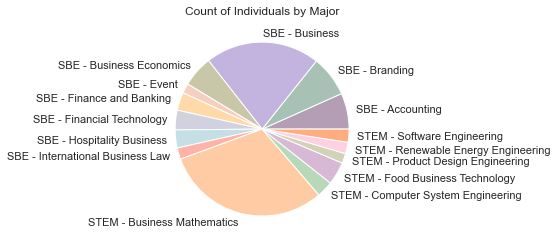

In [48]:
colors = ['#B39EB5', '#A7C1B4', '#C2B4DE', '#C8C8A9', '#F5D0C1', '#FFD9A7', '#D1D1E0', '#C4DFE6', '#FFB2A8', '#FFCBA4', '#B7D8B9', '#D7B9D5', '#D0D3B5', '#FFCFE2', '#FFAC81', '#FFE4B3']

df.groupby('major').count()["age"].plot(kind="pie", colors=colors)
plt.title("Count of Individuals by Major")
plt.ylabel("")
plt.show()

Based on the above pie chart, it can be clearly seen that most respondences came from Business Mathematics and Business major since those two have the highest number of attendances at STEM and SBE respectively.

In [49]:
pd.DataFrame(df.groupby('major')['age'].count()).reset_index().rename(columns={'age':'count'}).sort_values(by='count',ascending=False).reset_index(drop=True)

major  count
0           STEM - Business Mathematics    101
1                        SBE - Business     70
2                        SBE - Branding     25
3                      SBE - Accounting     22
4              SBE - Business Economics     19
5       STEM - Food Business Technology     14
6            SBE - Financial Technology     12
7             SBE - Finance and Banking     11
8            SBE - Hospitality Business     11
9    STEM - Computer System Engineering     10
10          STEM - Software Engineering      8
11     SBE - International Business Law      7
12  STEM - Renewable Energy Engineering      7
13                          SBE - Event      6
14    STEM - Product Design Engineering      6

In this survey, the respondents are predominantly from the Business Mathematics department, with a total of 102 students. They are followed by students from the Business department, with a total of 70 students.

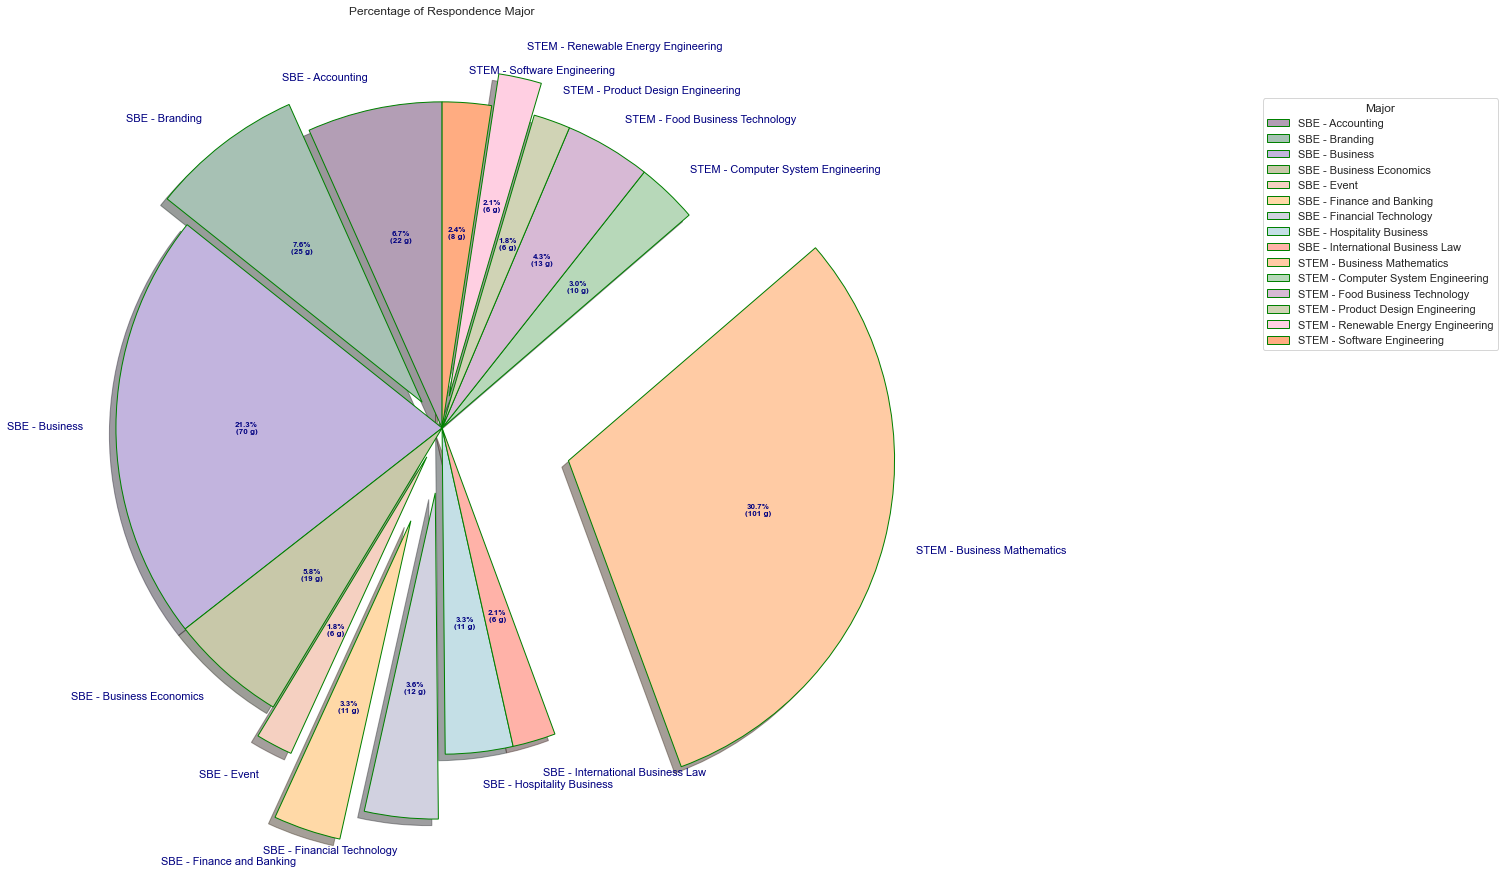

In [53]:
# Creating dataset
major=pd.DataFrame(df.groupby('major')['age'].count()).reset_index().rename(columns={'age':'count_major'})
major_name=major['major']
data=major.count_major

# Creating explode data
explode = (0.0, 0.1,0.0,0.0,0.1,0.3, 0.2, 0.0,0.0,0.4, 0.0, 0.0,0.0,0.1,0.0)
 
# Creating color parameters
colors = ['#B39EB5', '#A7C1B4', '#C2B4DE', '#C8C8A9', '#F5D0C1', '#FFD9A7', '#D1D1E0', '#C4DFE6', '#FFB2A8', '#FFCBA4', '#B7D8B9', '#D7B9D5', '#D0D3B5', '#FFCFE2', '#FFAC81', '#FFE4B3']
 
# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
 
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)
 
# Creating plot
fig, ax = plt.subplots(figsize =(20, 15))
wedges, texts, autotexts = ax.pie(data,
                                  autopct = lambda pct: func(pct, data),
                                  explode = explode,
                                  labels = major_name,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="navy"))
 
# Adding legend
ax.legend(wedges, major_name,
          title ="Major",
          loc ="center left",
          bbox_to_anchor =(1.5, 0.5, 0.5, 0.5))
 
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Percentage of Respondence Major")
 
# show plot
plt.show()

Based on the percentage of respondents, the largest proportion comes from STEM (Business Mathematics) at 30.9%, followed by SBE (Business) at 21.2%.

In [54]:
df.groupby('major').mean()

age      height     weight  \
major                                                                   
SBE - Accounting                     20.181818  161.954545  55.500000   
SBE - Branding                       20.200000  165.280000  59.960000   
SBE - Business                       19.728571  165.314286  62.685714   
SBE - Business Economics             20.894737  165.736842  63.473684   
SBE - Event                          19.666667  166.166667  61.666667   
SBE - Finance and Banking            19.727273  162.909091  58.636364   
SBE - Financial Technology           18.750000  165.583333  61.416667   
SBE - Hospitality Business           19.909091  161.818182  55.545455   
SBE - International Business Law     19.714286  161.285714  56.857143   
STEM - Business Mathematics          20.287129  165.247525  59.524752   
STEM - Computer System Engineering   20.300000  163.600000  54.300000   
STEM - Food Business Technology      20.285714  166.785714  62.500000   
STEM - Product Design Engineering    19.166667  170.833333  66.166667   
STEM - Renewable Energy Engineering  20.428571  164.285714  57.714286   
STEM - Software Engineering          19.375000  163.000000  57.500000   

                                     fastfood_consumed  sugary_drinks  \
major                                                                   
SBE - Accounting                              3.636364       1.954545   
SBE - Branding                                3.840000       2.840000   
SBE - Business                                4.314286       2.371429   
SBE - Business Economics                      4.947368       2.526316   
SBE - Event                                   3.666667       2.666667   
SBE - Finance and Banking                     4.454545       1.545455   
SBE - Financial Technology                    4.250000       2.583333   
SBE - Hospitality Business                    4.227273       1.727273   
SBE - International Business Law              5.428571       3.142857   
STEM - Business Mathematics                   3.683168       2.356436   
STEM - Computer System Engineering            3.400000       2.600000   
STEM - Food Business Technology               3.928571       2.071429   
STEM - Product Design Engineering             4.000000       2.666667   
STEM - Renewable Energy Engineering           3.285714       3.142857   
STEM - Software Engineering                   3.125000       2.500000   

                                     fruits_vegetables  exercise   resting  \
major                                                                        
SBE - Accounting                              5.636364  4.136364  6.136364   
SBE - Branding                                5.800000  3.360000  5.880000   
SBE - Business                                5.942857  2.857143  6.285714   
SBE - Business Economics                      6.105263  3.368421  6.421053   
SBE - Event                                   6.000000  2.833333  5.833333   
SBE - Finance and Banking                     7.545455  4.000000  6.272727   
SBE - Financial Technology                    6.583333  2.333333  5.916667   
SBE - Hospitality Business                    6.181818  2.818182  6.181818   
SBE - International Business Law              6.714286  2.000000  6.857143   
STEM - Business Mathematics                   5.871287  3.207921  6.534653   
STEM - Computer System Engineering            7.000000  3.100000  5.500000   
STEM - Food Business Technology               5.428571  2.785714  6.857143   
STEM - Product Design Engineering             6.833333  3.000000  5.500000   
STEM - Renewable Energy Engineering           9.285714  6.714286  5.857143   
STEM - Software Engineering                   7.750000  1.625000  6.250000   

                                      smoking  alcohol_consumed     meals  \
major                                                                       
SBE - Accounting                     1.090909          2.227273  1.818182   
S

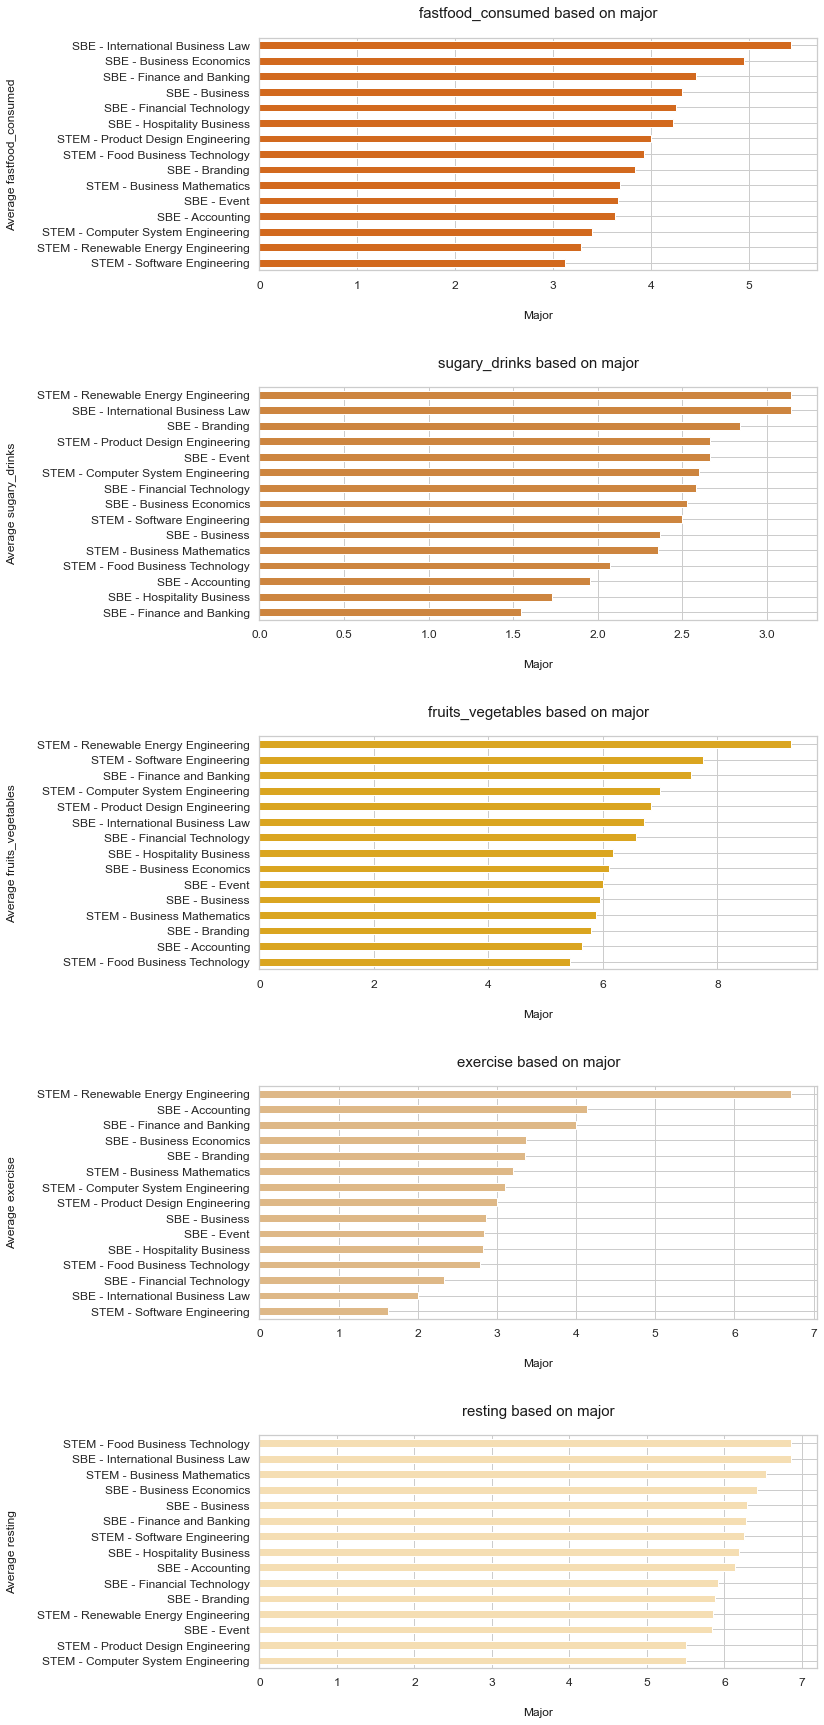

In [55]:
sns.set_style("whitegrid")
fig,ax = plt.subplots(5,1,figsize=(10,30))
major=df.groupby('major').mean()
var=['fastfood_consumed','sugary_drinks','fruits_vegetables','exercise','resting']
color=['chocolate','peru','goldenrod','burlywood','wheat']

for i in range (len(var)):
    if i%2==0:x=0
    else:x=1
    major[var[i]].sort_values().plot(kind="barh",color=color[i], alpha = 1, fontsize = 12,ax=ax[i])
    ax[i].tick_params(labelrotation=0)
    ax[i].set_xlabel("Major", fontsize=12, color="k", labelpad=20, ha="center")
    ax[i].set_ylabel("Average "+var[i],fontsize=12, color="k", labelpad=20, ha="center")
    ax[i].set_title(var[i]+" based on major", fontsize=15, color="k", pad=20)
plt.subplots_adjust(wspace=0.4,hspace=0.5);

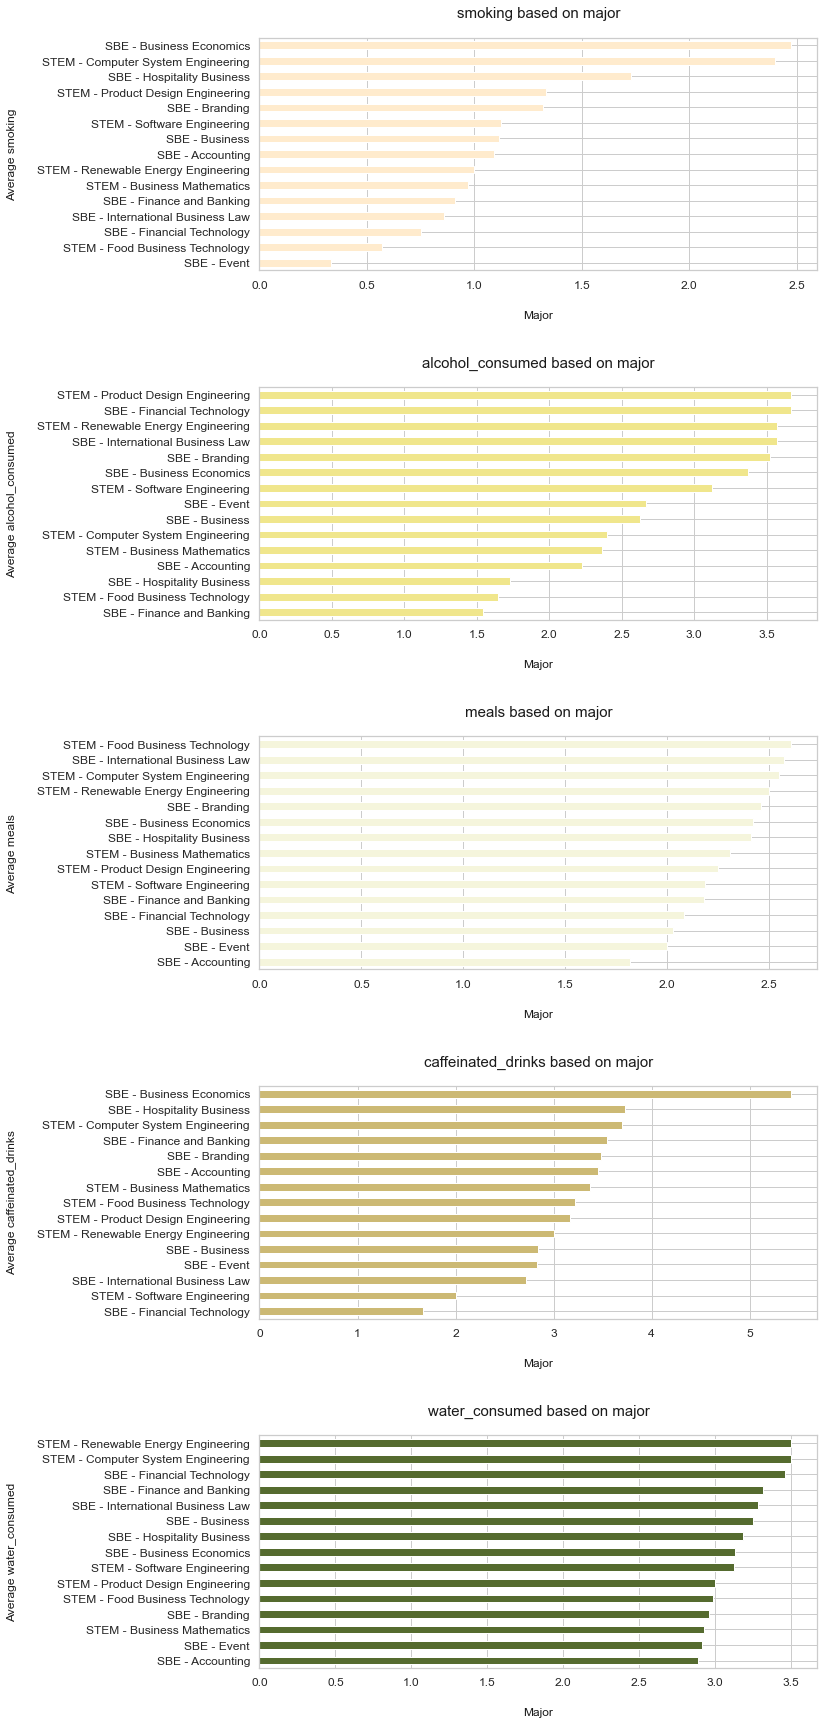

In [56]:
sns.set_style("whitegrid")
fig,ax = plt.subplots(5,1,figsize=(10,30))
major=df.groupby('major').mean()
var=['smoking','alcohol_consumed','meals','caffeinated_drinks','water_consumed']
color=['blanchedalmond','khaki','beige','y','darkolivegreen']

for i in range (len(var)):
    if i%2==0:x=0
    else:x=1
    major[var[i]].sort_values().plot(kind="barh",color=color[i], alpha = 1, fontsize = 12,ax=ax[i])
    ax[i].tick_params(labelrotation=0)
    ax[i].set_xlabel("Major", fontsize=12, color="k", labelpad=20, ha="center")
    ax[i].set_ylabel("Average "+var[i],fontsize=12, color="k", labelpad=20, ha="center")
    ax[i].set_title(var[i]+" based on major", fontsize=15, color="k", pad=20)
plt.subplots_adjust(wspace=0.4,hspace=0.5);

Based on the visualization above, there are several departments that have relatively unhealthy habits:

SBE - International Business Law: On average, students in this department consume a high amount of junk food, ranking first in terms of consumption. They also consume a significant amount of sugary drinks, ranking second in that category. Additionally, they have one of the lowest rankings for time spent on exercise.

SBE - Business Economics: Students in this department rank within the top three for consuming fast food and caffeinated drinks.

On the other hand, there is a department that exhibits relatively healthy habits:

STEM - Renewable Engineering: Students in this department consume a significant amount of water, vegetables, and fruits. They also spend more time on exercise compared to other departments.

### <font color=pink> **Step 3: BMI Analysis** </font>

In [57]:
#Sorting respondence only from STEM - Business Mathematics,SBE - Finance and Banking, SBE - Financial Technology major
bmi=df.copy()
bmi

age     gender  height  weight  fastfood_consumed  sugary_drinks  \
0     21  Perempuan     170      60                2.0              0   
1     21  Perempuan     154      48                3.0              0   
2     20  Perempuan     153      48                3.0              0   
3     21  Perempuan     156      45                3.0              1   
4     20  Perempuan     168      55                2.0              1   
..   ...        ...     ...     ...                ...            ...   
324   21  Laki-laki     168      64                4.0              1   
325   18  Perempuan     160      49                3.0              0   
326   18  Perempuan     162      58                2.0              3   
327   19  Laki-laki     167      62                4.0              3   
328   21  Laki-laki     176      67                6.0              1   

     fruits_vegetables  exercise  resting  smoking  alcohol_consumed  meals  \
0                    1       7.0        9        0               0.0    1.5   
1                    5       3.0        9        0               0.0    1.5   
2                    7       0.0        5        0               0.0    1.5   
3                    8       0.0        7        0               2.0    2.0   
4                    5       6.0       10        0               0.0    2.0   
..                 ...       ...      ...      ...               ...    ...   
324                  7       3.0        7        5               1.0    2.5   
325                  5       1.0        7        1               0.0    3.0   
326                  8       1.0        5        0               3.0    1.0   
327                 11       2.0        7        1               1.0    1.0   
328                  1       2.0        6        5               0.0    2.0   

                                  major  year              Domisili asli  \
0           STEM - Business Mathematics  2020  Jawa (selain Jabodetabek)   
1           STEM - Business Mathematics  2020  Jawa (selain Jabodetabek)   
2           STEM - Business Mathematics  2020                Jabodetabek   
3           STEM - Business Mathematics  2020     Bali dan Nusa Tenggara   
4           STEM - Business Mathematics  2020  Jawa (selain Jabodetabek)   
..                                  ...   ...                        ...   
324  STEM - Computer System Engineering  2020                Jabodetabek   
325                    SBE - Accounting  2021                Jabodetabek   
326         STEM - Business Mathematics  2021     Bali dan Nusa Tenggara   
327         STEM - Business Mathematics  2021  Jawa (selain Jabodetabek)   
328            SBE - Business Economics  2020  Jawa (selain Jabodetabek)   

     caffeinated_drinks  water_consumed vitamins        bmi       ets  
0                     2             2.5        0  20.761246  0.111111  
1                     2             7.0        1  20.239501  0.047619  
2                     0             3.0        1  20.504934  0.000000  
3                     5             1.0        1  18.491124  0.000000  
4                     1             3.0        1  19.486961  0.085714  
..                  ...             ...      ...        ...       ...  
324                   3             3.0        0  22.675737  0.061224  
325                   0             3.0        0  19.140625  0.020408  
326                   1             3.0        0  22.100290  0.028571  
327                   1             3.0        1  22.230987  0.040816  
328                   4             4.0        1  21.629649  0.047619  

[329 rows x 20 columns]

In [58]:
bmi['status']=bmi['bmi']
bmi.loc[bmi.bmi<18.5,'status']="underweight"
bmi.loc[(bmi.bmi>18.5)&(bmi.bmi<25),'status']="normal"
bmi.loc[(bmi.bmi>25)&(bmi.bmi<30),'status']="overweight"
bmi.loc[(bmi.bmi>30)&(bmi.bmi<35),'status']="obese"
bmi.loc[(bmi.bmi>35),'status']="extremely obese"
bmi

age     gender  height  weight  fastfood_consumed  sugary_drinks  \
0     21  Perempuan     170      60                2.0              0   
1     21  Perempuan     154      48                3.0              0   
2     20  Perempuan     153      48                3.0              0   
3     21  Perempuan     156      45                3.0              1   
4     20  Perempuan     168      55                2.0              1   
..   ...        ...     ...     ...                ...            ...   
324   21  Laki-laki     168      64                4.0              1   
325   18  Perempuan     160      49                3.0              0   
326   18  Perempuan     162      58                2.0              3   
327   19  Laki-laki     167      62                4.0              3   
328   21  Laki-laki     176      67                6.0              1   

     fruits_vegetables  exercise  resting  smoking  ...  meals  \
0                    1       7.0        9        0  ...    1.5   
1                    5       3.0        9        0  ...    1.5   
2                    7       0.0        5        0  ...    1.5   
3                    8       0.0        7        0  ...    2.0   
4                    5       6.0       10        0  ...    2.0   
..                 ...       ...      ...      ...  ...    ...   
324                  7       3.0        7        5  ...    2.5   
325                  5       1.0        7        1  ...    3.0   
326                  8       1.0        5        0  ...    1.0   
327                 11       2.0        7        1  ...    1.0   
328                  1       2.0        6        5  ...    2.0   

                                  major  year              Domisili asli  \
0           STEM - Business Mathematics  2020  Jawa (selain Jabodetabek)   
1           STEM - Business Mathematics  2020  Jawa (selain Jabodetabek)   
2           STEM - Business Mathematics  2020                Jabodetabek   
3           STEM - Business Mathematics  2020     Bali dan Nusa Tenggara   
4           STEM - Business Mathematics  2020  Jawa (selain Jabodetabek)   
..                                  ...   ...                        ...   
324  STEM - Computer System Engineering  2020                Jabodetabek   
325                    SBE - Accounting  2021                Jabodetabek   
326         STEM - Business Mathematics  2021     Bali dan Nusa Tenggara   
327         STEM - Business Mathematics  2021  Jawa (selain Jabodetabek)   
328            SBE - Business Economics  2020  Jawa (selain Jabodetabek)   

    caffeinated_drinks  water_consumed  vitamins        bmi       ets  \
0                    2             2.5         0  20.761246  0.111111   
1                    2             7.0         1  20.239501  0.047619   
2                    0             3.0         1  20.504934  0.000000   
3                    5             1.0         1  18.491124  0.000000   
4                    1             3.0         1  19.486961  0.085714   
..                 ...             ...       ...        ...       ...   
324                  3             3.0         0  22.675737  0.061224   
325                  0             3.0         0  19.140625  0.020408   
326                  1             3.0         0  22.100290  0.028571   
327                  1             3.0         1  22.230987  0.040816   
328                  4             4.0         1  21.629649  0.047619   

          status  
0         normal  
1         normal  
2         normal  
3    underweight  
4         normal  
..           ...  
324       normal  
325       normal  
326       normal  
327       normal  
328       normal  

[329 rows x 21 columns]

In [59]:
status=pd.DataFrame(bmi.groupby('status').count()['age']).rename(columns={'age':'students'})
status

students
status               
normal            238
overweight         49
underweight        42

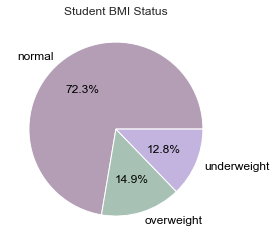

In [65]:
import matplotlib.pyplot as plt

colors = ['#B39EB5', '#A7C1B4', '#C2B4DE']

# Adding percentage values on the pie chart
total_students = sum(status.students)
percentages = [(val / total_students) * 100 for val in status.students]
textprops = {'color': 'black', 'fontsize': 12}

plt.pie(status.students, labels=labels, colors=colors, autopct='%1.1f%%', textprops=textprops)
plt.title('Student BMI Status')

plt.show()

Based on the pie chart, the majority of Prasetiya Mulya University students have a normal BMI. However, there are 60 students classified as underweight and 62 students classified as overweight.

In [67]:
major_stat=pd.DataFrame(bmi[(bmi.major=='STEM - Business Mathematics')|(bmi.major=='SBE - Business')|(bmi.major=='SBE - Branding')].groupby(['major','status']).count()['age']).rename(columns={'age':'students'})
major_stat['percentage']=[27/34,2/17,3/34,8/11,5/33,4/33,3/4,5/48,7/48]
major_stat

students  percentage
major                       status                           
SBE - Branding              normal             18    0.794118
                            overweight          5    0.117647
                            underweight         2    0.088235
SBE - Business              normal             53    0.727273
                            overweight         13    0.151515
                            underweight         4    0.121212
STEM - Business Mathematics normal             68    0.750000
                            overweight         15    0.104167
                            underweight        18    0.145833

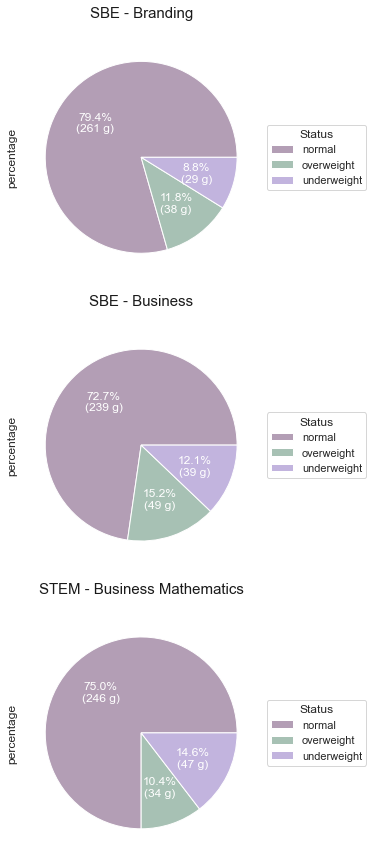

In [70]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(3, 1, figsize=(10, 15))
major = ["SBE - Branding", "SBE - Business", "STEM - Business Mathematics"]
colors = ['#B39EB5', '#A7C1B4', '#C2B4DE']

for i in range(len(major)):
    major_stat.xs(major[i], level='major')['percentage'].plot.pie(
        y='percentage',
        autopct=lambda pct: func(pct, data),
        textprops=dict(color="w"),
        ax=ax[i],
        colors=colors
    )
    ax[i].set_title(major[i], fontsize=15, color="k", pad=20)
    ax[i].legend(
        major_stat.reset_index()['status'].unique(),
        title="Status",
        loc="center left",
        bbox_to_anchor=(1, 0, 0.5, 1)
    )

plt.subplots_adjust(wspace=0.4)

Based on the three pie charts of the most represented departments, the average proportion of students with a normal BMI ranges from 72.7% to 79.4%, which can be considered quite good. In the case of SBE, the proportion of overweight students is higher than the proportion of underweight students. This is in contrast to what is observed in the Business Mathematics department.

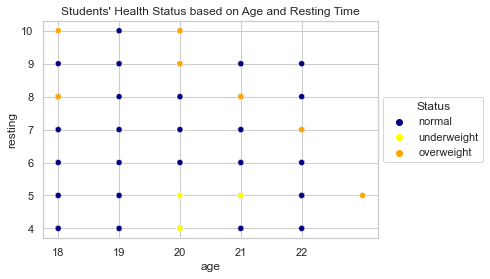

In [72]:
pl = sns.scatterplot(data = bmi,x=bmi.age, y=bmi.resting,hue=bmi.status, palette= ['navy','yellow','orange'])
pl.set_title("Students' Health Status based on Age and Resting Time")
plt.xticks([18,19,20,21,22])
plt.legend(title="Status",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

On average, Prasetiya Mulya University students who sleep for more than 6 hours have a higher potential for being overweight. Conversely, students who sleep less than 6 hours have a higher potential for being underweight.

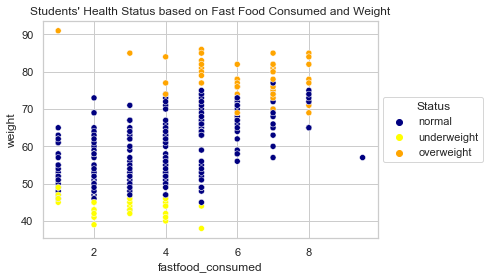

In [73]:
pl = sns.scatterplot(data = bmi,x=bmi.fastfood_consumed, y=bmi.weight,hue=bmi.status, palette= ['navy','yellow','orange'])
pl.set_title("Students' Health Status based on Fast Food Consumed and Weight")
plt.legend(title="Status",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

On average, Prasetiya Mulya University students who consume more than 4 servings of fast food per week have a higher potential for experiencing overweight.

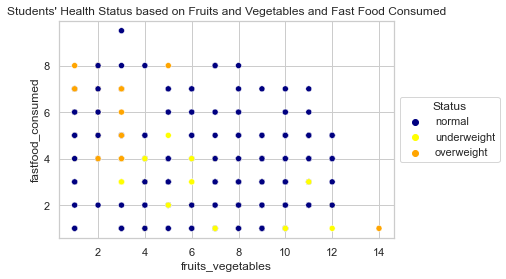

In [74]:
pl = sns.scatterplot(data = bmi,x=bmi.fruits_vegetables, y=bmi.fastfood_consumed,hue=bmi.status, palette= ['navy','yellow','orange'])
pl.set_title("Students' Health Status based on Fruits and Vegetables and Fast Food Consumed")
plt.legend(title="Status",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

Prasetiya Mulya University students who consume a low amount of vegetables and fruits and frequently consume junk food are at risk of overweight. On the other hand, students who consume vegetables frequently and rarely consume junk food are at risk of being underweight.

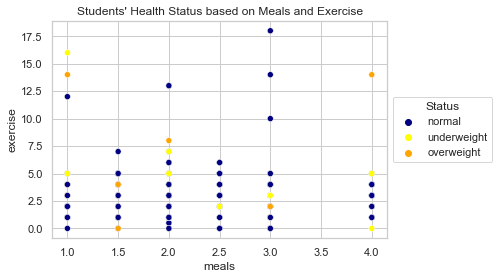

In [75]:
pl = sns.scatterplot(data = bmi,x=bmi.meals, y=bmi.exercise,hue=bmi.status, palette= ['navy','yellow','orange'])
pl.set_title("Students' Health Status based on Meals and Exercise")
plt.legend(title="Status",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

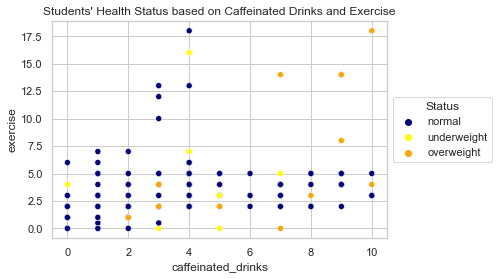

In [76]:
pl = sns.scatterplot(data = bmi,x=bmi.caffeinated_drinks, y=bmi.exercise,hue=bmi.status, palette= ['navy','yellow','orange'])
pl.set_title("Students' Health Status based on Caffeinated Drinks and Exercise")
plt.legend(title="Status",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

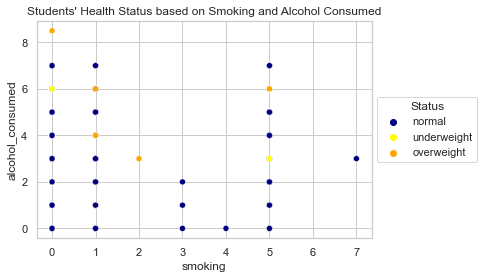

In [77]:
pl = sns.scatterplot(data = bmi,x=bmi.smoking, y=bmi.alcohol_consumed,hue=bmi.status, palette= ['navy','yellow','orange'])
pl.set_title("Students' Health Status based on Smoking and Alcohol Consumed")
plt.legend(title="Status",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

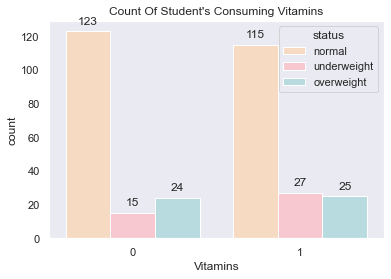

In [90]:
plt.figure()
pastel_palette = ["#FFDAB9", "#FFC0CB", "#B0E0E6", "#90EE90", "#ADD8E6"]

pl = sns.countplot(x=bmi['vitamins'], hue=bmi.status, palette=pastel_palette)

# Add count values on top of each bar
for p in pl.patches:
    pl.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

pl.set_title("Count Of Student's Consuming Vitamins")
pl.set_xlabel("Vitamins")
plt.show()

Based on the graph, the number of underweight students who consume/take vitamins is higher compared to those who do not. In contrast, the number of normal and overweight students who do not consume/take vitamins is higher.

In [81]:
vit=pd.DataFrame(bmi.groupby(['vitamins','status']).count()['age']).rename(columns={'age':'Count'})
vit['Percentage']=[53/70,16/105,19/210,143/214,15/107,41/214]
vit

Count  Percentage
vitamins status                        
0        normal         123    0.757143
         overweight      24    0.152381
         underweight     15    0.090476
1        normal         115    0.668224
         overweight      25    0.140187
         underweight     27    0.191589

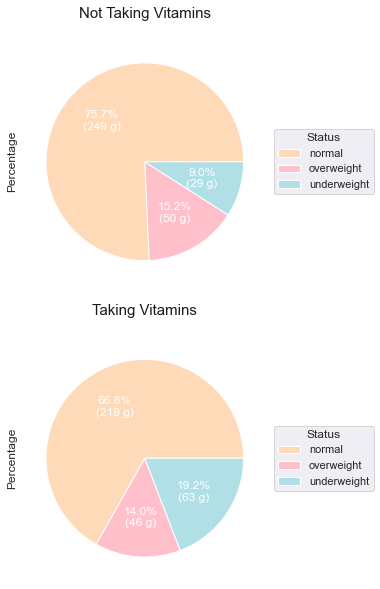

In [91]:
sns.set_style("dark")
fig, ax = plt.subplots(2, 1, figsize=(10, 10))

pastel_palette = ["#FFDAB9", "#FFC0CB", "#B0E0E6"]

for i in range(len(vit_stat)):
    vit.xs(vit_stat[i], level='vitamins')['Percentage'].plot.pie(y='Percentage', autopct=lambda pct: func(pct, data),
                                                                textprops=dict(color="w"), ax=ax[i],
                                                                colors=pastel_palette)
    ax[i].legend(vit.reset_index()['status'].unique(),
                 title="Status",
                 loc="center left",
                 bbox_to_anchor=(1, 0, 0.5, 1))
    ax[i].set_title("Not Taking Vitamins" if i == 0 else "Taking Vitamins", fontsize=15, color="k", pad=20)

plt.subplots_adjust(wspace=0.4)

From the two pie charts above, it can be concluded that underweight students tend to consume/take vitamins, as there is a 10% increase from not taking vitamins (9%) to taking vitamins (19%). This is in contrast to overweight students, where the percentage of overweight students taking vitamins decreases by 1% compared to those not taking vitamins.

### <font color=pink> **Step 4: Exercise to Sleep Analysis** </font>

In [92]:
ets=df.copy()
ets

age     gender  height  weight  fastfood_consumed  sugary_drinks  \
0     21  Perempuan     170      60                2.0              0   
1     21  Perempuan     154      48                3.0              0   
2     20  Perempuan     153      48                3.0              0   
3     21  Perempuan     156      45                3.0              1   
4     20  Perempuan     168      55                2.0              1   
..   ...        ...     ...     ...                ...            ...   
324   21  Laki-laki     168      64                4.0              1   
325   18  Perempuan     160      49                3.0              0   
326   18  Perempuan     162      58                2.0              3   
327   19  Laki-laki     167      62                4.0              3   
328   21  Laki-laki     176      67                6.0              1   

     fruits_vegetables  exercise  resting  smoking  alcohol_consumed  meals  \
0                    1       7.0        9        0               0.0    1.5   
1                    5       3.0        9        0               0.0    1.5   
2                    7       0.0        5        0               0.0    1.5   
3                    8       0.0        7        0               2.0    2.0   
4                    5       6.0       10        0               0.0    2.0   
..                 ...       ...      ...      ...               ...    ...   
324                  7       3.0        7        5               1.0    2.5   
325                  5       1.0        7        1               0.0    3.0   
326                  8       1.0        5        0               3.0    1.0   
327                 11       2.0        7        1               1.0    1.0   
328                  1       2.0        6        5               0.0    2.0   

                                  major  year              Domisili asli  \
0           STEM - Business Mathematics  2020  Jawa (selain Jabodetabek)   
1           STEM - Business Mathematics  2020  Jawa (selain Jabodetabek)   
2           STEM - Business Mathematics  2020                Jabodetabek   
3           STEM - Business Mathematics  2020     Bali dan Nusa Tenggara   
4           STEM - Business Mathematics  2020  Jawa (selain Jabodetabek)   
..                                  ...   ...                        ...   
324  STEM - Computer System Engineering  2020                Jabodetabek   
325                    SBE - Accounting  2021                Jabodetabek   
326         STEM - Business Mathematics  2021     Bali dan Nusa Tenggara   
327         STEM - Business Mathematics  2021  Jawa (selain Jabodetabek)   
328            SBE - Business Economics  2020  Jawa (selain Jabodetabek)   

     caffeinated_drinks  water_consumed vitamins        bmi       ets  
0                     2             2.5        0  20.761246  0.111111  
1                     2             7.0        1  20.239501  0.047619  
2                     0             3.0        1  20.504934  0.000000  
3                     5             1.0        1  18.491124  0.000000  
4                     1             3.0        1  19.486961  0.085714  
..                  ...             ...      ...        ...       ...  
324                   3             3.0        0  22.675737  0.061224  
325                   0             3.0        0  19.140625  0.020408  
326                   1             3.0        0  22.100290  0.028571  
327                   1             3.0        1  22.230987  0.040816  
328                   4             4.0        1  21.629649  0.047619  

[329 rows x 20 columns]

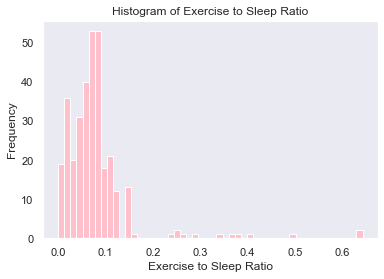

In [94]:
plt.hist(ets['ets'], bins=50, color='pink')
plt.xlabel('Exercise to Sleep Ratio')
plt.ylabel('Frequency')
plt.title('Histogram of Exercise to Sleep Ratio')
plt.show()

The distribution of the exercise to sleep ratio is skewed to the right, indicating that the mean is larger than the median, and the median is larger than the mode. Most students have an exercise to sleep ratio between 0-0.1. This suggests a low exercise to sleep ratio among Prasetiya Mulya University students.

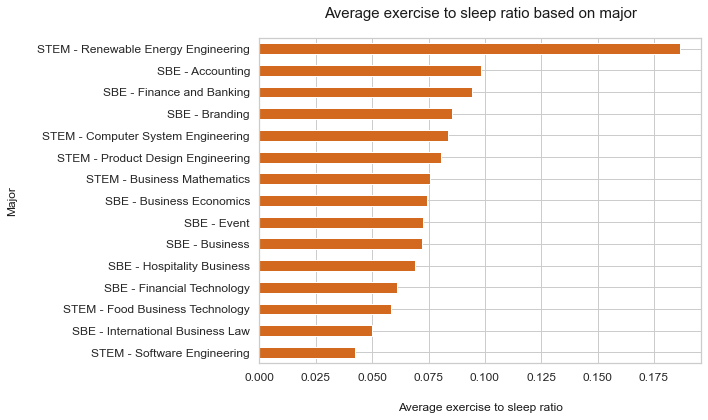

In [95]:
sns.set_style("whitegrid")

major = ets.groupby('major').mean()

fig, ax = plt.subplots(figsize=(10, 6))
major['ets'].sort_values().plot(kind="barh", color='chocolate', alpha=1, fontsize=12, ax=ax)

ax.tick_params(labelrotation=0)
ax.set_xlabel("Average exercise to sleep ratio", fontsize=12, color="k", labelpad=20, ha="center")
ax.set_ylabel("Major", fontsize=12, color="k", labelpad=20, ha="center")
ax.set_title("Average exercise to sleep ratio based on major", fontsize=15, color="k", pad=20)

plt.tight_layout()
plt.show()

Students in the Renewable Energy Engineering department have the highest average exercise to sleep ratio, with a ratio exceeding 0.175. On the other hand, students in the Software Engineering department have the lowest average exercise to sleep ratio.

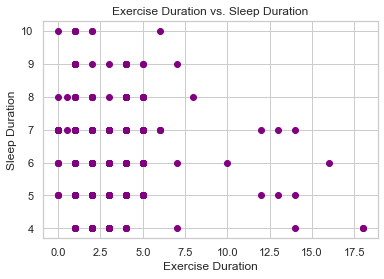

In [97]:
plt.scatter(ets['exercise'], ets['resting'], color='purple')
plt.xlabel('Exercise Duration')
plt.ylabel('Sleep Duration')
plt.title('Exercise Duration vs. Sleep Duration')
plt.show()

Students who have an exercise duration exceeding 10 hours per week tend to have a sleep duration between 4-7 hours per day.

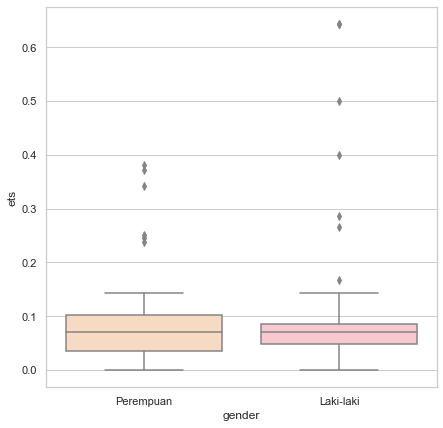

In [98]:
pastel_palette = ["#FFDAB9", "#FFC0CB", "#B0E0E6", "#90EE90", "#ADD8E6"]

fig, ax = plt.subplots(figsize=(7, 7))
sns.boxplot(data=ets, x='gender', y='ets', palette=pastel_palette)
plt.show()

From the visualization of the boxplot for age, it can be observed that the maximum point of the exercise to sleep ratio is higher for females compared to males. The minimum points for both females and males appear to be at 0. It is also noticeable that the interquartile range (IQR) for females is longer than the IQR for males, indicating that the exercise to sleep ratio data for females has a larger variation.

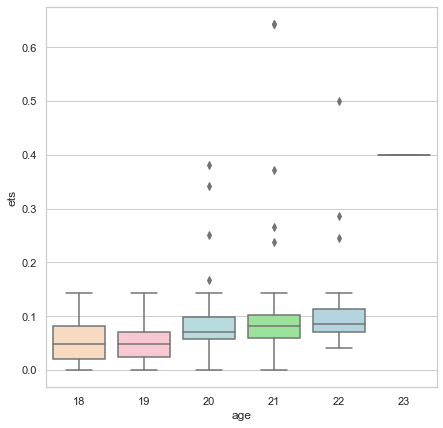

In [99]:
pastel_palette = ["#FFDAB9", "#FFC0CB", "#B0E0E6", "#90EE90", "#ADD8E6"]
fig, ax = plt.subplots(figsize=(7, 7))
sns.boxplot(data=ets, x='age', y='ets', palette=pastel_palette)
plt.show()

The concentration of the exercise to sleep ratio data increases with the age of the students. In contrast, younger students have a minimum exercise to sleep ratio of 0, indicating that some of them do not engage in regular exercise. However, for students at the age of 22, all of them have participated in exercise activities.

## <font color=palevioletred>**F. Clustering Analysis** </font>

### <font color=hotpink>a. PCA Analysis</font> 

Principal Component Analysis is basically a statistical procedure to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables. 

Each of the principal components is chosen in such a way that it would describe most of them still available variance and all these principal components are orthogonal to each other. In all principal components, first principal component has a maximum variance.

In [100]:
from sklearn.decomposition import PCA
#changing data in gender column into 1: 'Laki-laki' and 0:"Perempuan"
bmi.loc[bmi.gender=='Laki-laki','gender']=1
bmi.loc[bmi.gender=='Perempuan','gender']=0
pca_df=bmi[['age','gender','height','weight','fastfood_consumed','sugary_drinks','fruits_vegetables','exercise','resting','smoking','alcohol_consumed','meals','caffeinated_drinks','water_consumed','vitamins']]
pca_df

age gender  height  weight  fastfood_consumed  sugary_drinks  \
0     21      0     170      60                2.0              0   
1     21      0     154      48                3.0              0   
2     20      0     153      48                3.0              0   
3     21      0     156      45                3.0              1   
4     20      0     168      55                2.0              1   
..   ...    ...     ...     ...                ...            ...   
324   21      1     168      64                4.0              1   
325   18      0     160      49                3.0              0   
326   18      0     162      58                2.0              3   
327   19      1     167      62                4.0              3   
328   21      1     176      67                6.0              1   

     fruits_vegetables  exercise  resting  smoking  alcohol_consumed  meals  \
0                    1       7.0        9        0               0.0    1.5   
1                    5       3.0        9        0               0.0    1.5   
2                    7       0.0        5        0               0.0    1.5   
3                    8       0.0        7        0               2.0    2.0   
4                    5       6.0       10        0               0.0    2.0   
..                 ...       ...      ...      ...               ...    ...   
324                  7       3.0        7        5               1.0    2.5   
325                  5       1.0        7        1               0.0    3.0   
326                  8       1.0        5        0               3.0    1.0   
327                 11       2.0        7        1               1.0    1.0   
328                  1       2.0        6        5               0.0    2.0   

     caffeinated_drinks  water_consumed vitamins  
0                     2             2.5        0  
1                     2             7.0        1  
2                     0             3.0        1  
3                     5             1.0        1  
4                     1             3.0        1  
..                  ...             ...      ...  
324                   3             3.0        0  
325                   0             3.0        0  
326                   1             3.0        0  
327                   1             3.0        1  
328                   4             4.0        1  

[329 rows x 15 columns]

In [101]:
from sklearn.preprocessing import StandardScaler
x = pca_df.values
x = StandardScaler().fit_transform(x) # normalizing the features

In [102]:
pca = PCA(n_components=2)
principalComponents_df = pca.fit_transform(x)

In [103]:
principal_df = pd.DataFrame(data = principalComponents_df, columns = ['principal component 1', 'principal component 2'])

In [104]:
principal_df.head()

principal component 1  principal component 2
0               0.064133              -0.753226
1              -1.374205              -0.808126
2              -2.913764              -1.504345
3              -2.209478               0.116412
4              -0.640636              -1.226615

In [105]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.23098723 0.15349208]


Variance each principal component holds after projecting the data to a lower dimensional subspace are 0.23098723 for component 1 and 0.15349208 for component 2. From the above output, it can be observed that the principal component 1 holds 23.1% of the information while the principal component 2 holds only 15.3% of the information. Also, the other point to note is that while projecting thirty-dimensional data to a two-dimensional data, 61.6% information was lost.

### <font color=hotpink>b. K-Means Clustering</font> 

#### <font color=pink> **Step 1: Determining Number of Cluster** </font>

#### <font color=plum> **Elbow Method** </font>

In [109]:
distortions = []
data=list(zip(principal_df['principal component 1'],principal_df['principal component 2']))
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data)
    distortions.append(kmeanModel.inertia_)

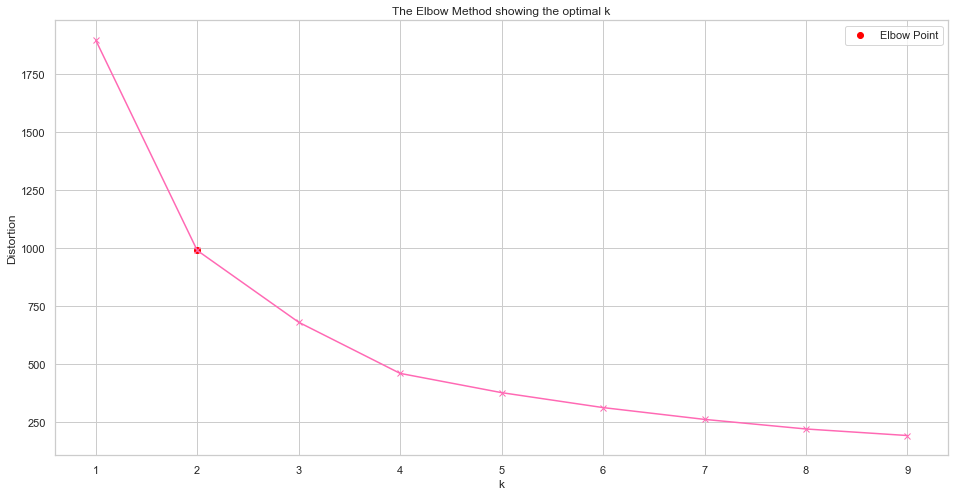

Elbow point: 2


In [114]:
# Calculate the differences between successive distortions
differences = [distortions[i] - distortions[i+1] for i in range(len(distortions)-1)]

# Find the index of the maximum difference
elbow_index = differences.index(max(differences))

# Plot the distortion values
plt.figure(figsize=(16, 8))
plt.plot(K, distortions, 'bx-',color='hotpink')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')

# Mark the elbow point on the plot
plt.scatter(K[elbow_index+1], distortions[elbow_index+1], c='red', marker='o', label='Elbow Point')

plt.legend()
plt.show()

# Print the elbow point
print("Elbow point:", K[elbow_index+1])

According to elbow method, the number of clusters should be 2

#### <font color=plum> **Silhouette Method** </font>

In [115]:
#Silhouette Method
def SelBest(arr:list, X:int)->list:
    '''
    returns the set of X configurations with shorter distance
    '''
    dx=np.argsort(arr)[:X]
    return arr[dx]

In [116]:
n_clusters=np.arange(2, 8)
sils=[]
sils_err=[]
iterations=20
for n in n_clusters:
    tmp_sil=[]
    for _ in range(iterations):
        gmm=KMeans(n_clusters=n, random_state=0).fit(principal_df) 
        labels=gmm.predict(principal_df)
        sil=metrics.silhouette_score(principal_df, labels, metric='manhattan')
        tmp_sil.append(sil)
    val=np.mean(SelBest(np.array(tmp_sil), int(iterations/5)))
    err=np.std(tmp_sil)
    sils.append(val)
    sils_err.append(err)

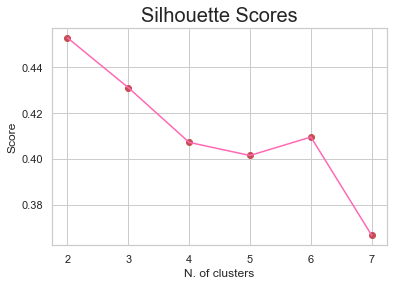

In [121]:
plt.errorbar(n_clusters, sils, yerr=sils_err, color='hotpink')
plt.scatter(n_clusters, sils, color='r')
plt.title("Silhouette Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")
plt.show()

Optimal number of clusters is taken from the highest silhouette score. Number of Clusters should be 2. Thus, 2 clusters is used.

#### <font color=pink> **Step 2: Clustering Process** </font>

In [122]:
kmeans = KMeans(init="random",n_clusters=2,n_init=10,max_iter=300,random_state=42)

In [123]:
kmeans.fit(principal_df)

KMeans(init='random', n_clusters=2, random_state=42)

In [124]:
# The lowest SSE value
kmeans.inertia_

991.2086730639282

Inertia is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster. This high value indicates that many data points must be far from the centroid.

In [125]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[ 1.77958805, -0.20122048],
       [-1.5282338 ,  0.17279951]])

The two clusters centers are (1.77958805, -0.20122048) and (-1.5282338 ,  0.17279951) indicating that this is the center point of the two groups.

In [126]:
# The number of iterations required to converge
kmeans.n_iter_

8

8 iterations is done to converge the existing data into its respective cluster.

In [127]:
kmeans.labels_[:5]

array([0, 1, 1, 1, 1], dtype=int32)

Cluster 0 contains 152 data points
Cluster 1 contains 177 data points


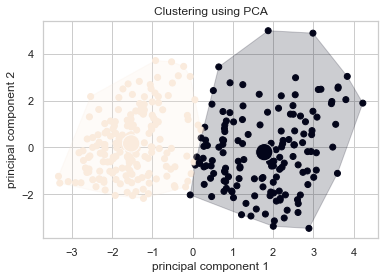

In [128]:
from sklearn.cluster import KMeans
import numpy as np
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

# Perform K-means clustering
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)

# Scatter plot of data points with cluster labels
scatter = plt.scatter(principal_df['principal component 1'], principal_df['principal component 2'], c=kmeans.labels_)

# Plot the outer shape for each cluster
for cluster_label in range(kmeans.n_clusters):
    # Get the data points for the current cluster
    cluster_points = principal_df[kmeans.labels_ == cluster_label][['principal component 1', 'principal component 2']]
    
    # Compute the convex hull of the cluster points
    hull = ConvexHull(cluster_points)
    
    # Get the outermost points of the convex hull
    outer_points = cluster_points.iloc[hull.vertices]
    
    # Close the shape by adding the first point to the end
    outer_points = outer_points.append(outer_points.iloc[0])
    
    # Plot the shape
    polygon = Polygon(outer_points, closed=True, alpha=0.2, color=scatter.to_rgba(cluster_label))
    plt.gca().add_patch(polygon)

# Assign colors to the centroids based on cluster labels
centroid_colors = scatter.cmap(scatter.norm(np.arange(kmeans.n_clusters)))

# Scatter plot of centroids with specific colors
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='o', c=centroid_colors, edgecolor='white', s=300)

# Plot settings
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.title('Clustering using PCA')

# Count the number of data points in each cluster
cluster_counts = np.bincount(kmeans.labels_)

# Print the cluster counts
for cluster_label, count in enumerate(cluster_counts):
    print("Cluster", cluster_label, "contains", count, "data points")

# Display the plot
plt.show()

Cluster 0 contains 152 data points
Cluster 1 contains 177 data points


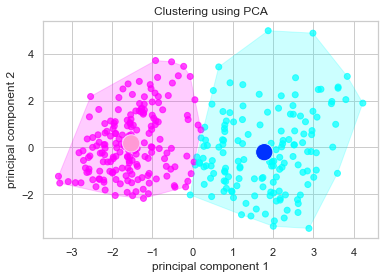

In [132]:
scatter = plt.scatter(principal_df['principal component 1'], principal_df['principal component 2'], c=kmeans.labels_, cmap='cool', alpha=0.7)
scatter.set_cmap('cool')  # Set the colormap for the scatter plot

# Plot the outer shape for each cluster
for cluster_label in range(kmeans.n_clusters):
    # Get the data points for the current cluster
    cluster_points = principal_df[kmeans.labels_ == cluster_label][['principal component 1', 'principal component 2']]
    
    # Compute the convex hull of the cluster points
    hull = ConvexHull(cluster_points)
    
    # Get the outermost points of the convex hull
    outer_points = cluster_points.iloc[hull.vertices]
    
    # Close the shape by adding the first point to the end
    outer_points = outer_points.append(outer_points.iloc[0])
    
    # Plot the shape
    polygon = Polygon(outer_points, closed=True, alpha=0.2, color=scatter.to_rgba(cluster_label))
    plt.gca().add_patch(polygon)

# Assign pink and blue colors to the centroids based on cluster labels
centroid_colors = ['blue', 'pink']

# Scatter plot of centroids with specific colors
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='o', c=centroid_colors, edgecolor='white', s=300)

# Plot settings
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.title('Clustering using PCA')

# Count the number of data points in each cluster
cluster_counts = np.bincount(kmeans.labels_)

# Print the cluster counts
for cluster_label, count in enumerate(cluster_counts):
    print("Cluster", cluster_label, "contains", count, "data points")

# Display the plot
plt.show()

This information gives an understanding of the distribution of data points across the clusters which is Cluster 0 has a relatively larger number of data points compared to Cluster 1.

In [133]:
import pandas as pd
from sklearn.cluster import KMeans

# Assuming you have performed K-means clustering on your data
kmeans = KMeans(n_clusters=2)

# Fit K-means on your data
kmeans.fit(data)

# Predict the cluster labels for all data points
predicted_labels = kmeans.predict(data)

# Create a new DataFrame with the data and corresponding cluster labels
data_with_clusters = pd.DataFrame({'Data': data, 'Cluster': predicted_labels})

# Count the number of data points per cluster
cluster_counts = data_with_clusters['Cluster'].value_counts()

# Display the counts per cluster
print(cluster_counts)

0    177
1    152
Name: Cluster, dtype: int64


Based on the above value, K-means clustering can perfectly predict and identify 177 data for cluster 0 and 152 data for cluster 1. This means that the model is accurate.

In [134]:
def plot_kmeans(kmeans, X, n_clusters=2, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X['principal component 1'], X['principal component 2'], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

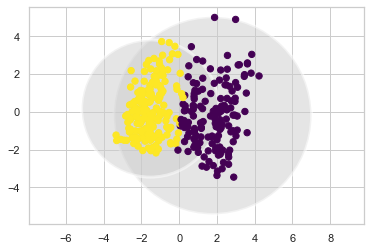

In [135]:
kmeans = KMeans(n_clusters=2, random_state=0)
plot_kmeans(kmeans,principal_df) 

An important observation for k-means is that these cluster models must be circular: k-means has no built-in way of accounting for oblong or elliptical clusters.

 the k-means model has no intrinsic measure of probability or uncertainty of cluster assignments 

#### <font color=pink> **Step 3: Calculating Metrics Coefficient** </font>

#### <font color=plum> **Silhouette Score** </font>

In [136]:
label=KMeans(n_clusters=2).fit(principal_df).predict(principal_df)
km_ss=silhouette_score(principal_df,labels=label)
print(f'Silhouette Score(n=2): {km_ss}')

Silhouette Score(n=2): 0.4413974064988822


The clusters are well apart from each other as the silhouette score is closer to 1. Therefore, based on the Silhouette Score above, the data is fairly clustered apart.

#### <font color=plum> **Calinski-Harabasz Index** </font>

In [137]:
ch_score_km = calinski_harabasz_score(principal_df, label)
print("Calinski-Harabasz Index:", ch_score_km)

Calinski-Harabasz Index: 298.9545435696507


#### <font color=plum> **Davies-Bouldin Index** </font>

In [138]:
db_score_km = davies_bouldin_score(principal_df, label)
print("Davies-Bouldin Index:", db_score_km)

Davies-Bouldin Index: 0.9278086058699371


### <font color=hotpink>c. Gaussian Mixture Model Clustering</font> 

from sklearn.metrics import silhouette_scoreA Gaussian mixture model (GMM) attempts to find a mixture of multi-dimensional Gaussian probability distributions that best model any input dataset. As the name implies, a Gaussian mixture model involves the mixture (i.e. superposition) of multiple Gaussian distributions. Here rather than identifying clusters by “nearest” centroids, we fit a set of k gaussians to the data. And we estimate gaussian distribution parameters such as mean and Variance for each cluster and weight of a cluster. After learning the parameters for each data point we can calculate the probabilities of it belonging to each of the clusters.

#### <font color=pink> **Step 1: Determining Number of Cluster** </font>

#### <font color=plum> **Silhouette Method** </font>

In [139]:
#silhouette method
n_clusters=np.arange(2, 8)
sils=[]
sils_err=[]
iterations=20
for n in n_clusters:
    tmp_sil=[]
    for _ in range(iterations):
        gmm=GaussianMixture(n, n_init=2).fit(principal_df) 
        labels=gmm.predict(principal_df)
        sil=metrics.silhouette_score(principal_df, labels, metric='manhattan')
        tmp_sil.append(sil)
    val=np.mean(SelBest(np.array(tmp_sil), int(iterations/5)))
    err=np.std(tmp_sil)
    sils.append(val)
    sils_err.append(err)

Text(0, 0.5, 'Score')

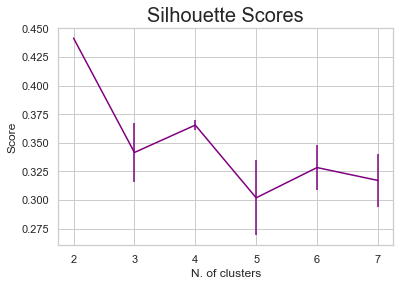

In [140]:
plt.errorbar(n_clusters, sils, yerr=sils_err, color='purple')
plt.title("Silhouette Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")

The silhouette score of the above is 2 as well. Thus, number of clusters used is also 2.

#### <font color=pink> **Step 2: Clustering Process** </font>

In [141]:
gmm = GaussianMixture(n_components = 2) 
gmm.fit(principal_df)

GaussianMixture(n_components=2)

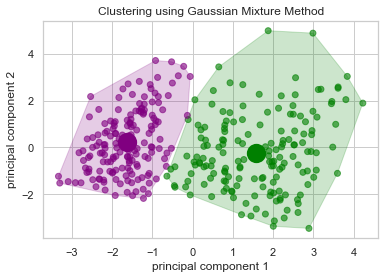

In [149]:
from sklearn.mixture import GaussianMixture
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

from sklearn.mixture import GaussianMixture
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

# Perform Gaussian Mixture clustering
gmm = GaussianMixture(n_components=2)
labels = gmm.fit_predict(principal_df)

# Scatter plot of data points with cluster labels
scatter = plt.scatter(principal_df['principal component 1'], principal_df['principal component 2'], c=labels, cmap=ListedColormap(['purple', 'green']), alpha=0.6)
plt.title('Clustering using Gaussian Mixture Method')
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')

# Plot the outer shape for each cluster
for cluster_label in range(gmm.n_components):
    # Get the data points for the current cluster
    cluster_points = principal_df[labels == cluster_label][['principal component 1', 'principal component 2']]

    # Compute the convex hull of the cluster points
    hull = ConvexHull(cluster_points)

    # Get the outermost points of the convex hull
    outer_points = cluster_points.iloc[hull.vertices]

    # Close the shape by adding the first point to the end
    outer_points = outer_points.append(outer_points.iloc[0])

    # Plot the shape
    polygon = Polygon(outer_points, closed=True, alpha=0.2, color=scatter.to_rgba(cluster_label))
    plt.gca().add_patch(polygon)

# Get cluster centers
centers = gmm.means_

# Plot centroids with filled circles
for cluster_label, center in enumerate(centers):
    plt.scatter(center[0], center[1], marker='o', s=300, linewidth=2, facecolors=['purple', 'green'][cluster_label])

# Display the plot
plt.show()


Result of Gaussian Mixture clustering method can be clearly seen on the above graph. Cluseter 1 seems to be more sparse compared to cluster 0. There are two neon green points which has component 2 value above 4.

#### <font color=plum> **Distance between GMMs** </font>

In [150]:
def gmm_js(gmm_p, gmm_q, n_samples=10**5):
    X = gmm_p.sample(n_samples)[0]
    log_p_X = gmm_p.score_samples(X)
    log_q_X = gmm_q.score_samples(X)
    log_mix_X = np.logaddexp(log_p_X, log_q_X)

    Y = gmm_q.sample(n_samples)[0]
    log_p_Y = gmm_p.score_samples(Y)
    log_q_Y = gmm_q.score_samples(Y)
    log_mix_Y = np.logaddexp(log_p_Y, log_q_Y)

    return np.sqrt((log_p_X.mean() - (log_mix_X.mean() - np.log(2))+ log_q_Y.mean() - (log_mix_Y.mean() - np.log(2))) / 2)

In [151]:
n_clusters=np.arange(2, 8)
iterations=20
results=[]
res_sigs=[]
for n in n_clusters:
    dist=[]
    
    for iteration in range(iterations):
        train, test=train_test_split(principal_df, test_size=0.5)
        gmm_train=GaussianMixture(n, n_init=2).fit(train) 
        gmm_test=GaussianMixture(n, n_init=2).fit(test) 
        dist.append(gmm_js(gmm_train, gmm_test))
    selec=SelBest(np.array(dist), int(iterations/5))
    result=np.mean(selec)
    res_sig=np.std(selec)
    results.append(result)
    res_sigs.append(res_sig)

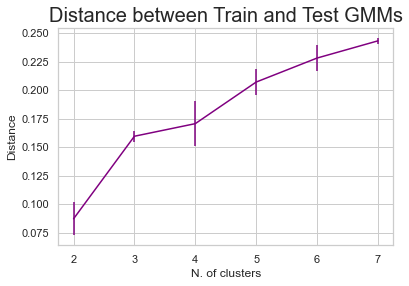

In [153]:
plt.errorbar(n_clusters, results, yerr=res_sigs, color='purple')
plt.title("Distance between Train and Test GMMs", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Distance")
plt.show()

#### <font color=plum> **Bayesian information criterion (BIC)** </font>

This criterion gives us an estimation on how much is good the GMM in terms of predicting the data we actually have. The lower is the BIC, the better is the model to actually predict the data we have. In order to avoid overfitting, this technique penalizes models with big number of clusters. Based on the above graph, it can be clearly seen that we correctly use 2 clusters which has the lowest distance between train and test gmms.

In [154]:
n_clusters=np.arange(2, 8)
bics=[]
bics_err=[]
iterations=20

for n in n_clusters:
    tmp_bic=[]
    for _ in range(iterations):
        gmm=GaussianMixture(n, n_init=2).fit(principal_df) 
        tmp_bic.append(gmm.bic(principal_df))
    val_bic=np.mean(SelBest(np.array(tmp_bic), int(iterations/5)))
    err_bic=np.std(tmp_bic)
    bics.append(val_bic)
    bics_err.append(err_bic)

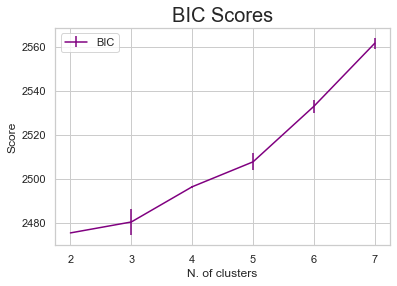

In [156]:
plt.errorbar(n_clusters,bics, yerr=bics_err, label='BIC',color='purple')
plt.title("BIC Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")
plt.legend()
plt.show()

Following this criterion, the lower the number of clusters, the better should be the model. Which means that the penalty BIC criteria gives to complex models do not save us from overfit. But before screaming and trashing out this technique, we can notice two things. The first is that the curve is fairly smooth and monotone. The second is that the curve follows different slopes in different part of it. Starting from these two observations, BIC score should be checked. Intuitively, the concept of gradient is simple: if two consecutive points have the same value, their gradient is zero. If they have different values, their gradient can be eighter negative, if the second point has a lower value, or positive otherwise. The magnitude of the gradient tells us how much the two values are different.

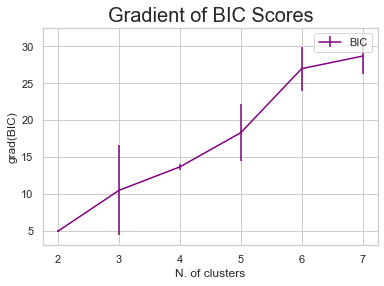

In [158]:
plt.errorbar(n_clusters, np.gradient(bics), yerr=bics_err, label='BIC', color='purple')
plt.title("Gradient of BIC Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("grad(BIC)")
plt.legend()
plt.show()

In [159]:
gmm = GaussianMixture(n_components = 2) 
gmm.fit(principal_df)

GaussianMixture(n_components=2)

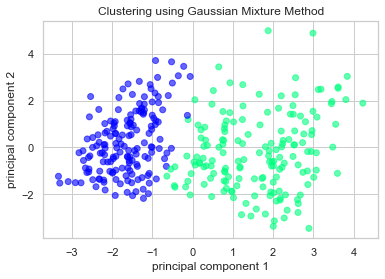

In [160]:
# Visualizing the clustering 
plt.scatter(principal_df['principal component 1'], principal_df['principal component 2'],  
           c = GaussianMixture(n_components = 2).fit_predict(principal_df), cmap =plt.cm.winter, alpha = 0.6) 
plt.title('Clustering using Gaussian Mixture Method')
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.show() 

This graph is the same with the previous clustering graph. This is just to reinforce that the number of clusters 2 is the best clustering number.

#### <font color=pink> **Step 3: Calculating Metrics Coefficient** </font>

#### <font color=plum> **Silhouette Score** </font>

In [161]:
gmm_ss=silhouette_score(principal_df,labels=gmm.predict(principal_df))
print(f'Silhouette Score(n=2): {gmm_ss}')

Silhouette Score(n=2): 0.43174736124628704


#### <font color=plum> **Calinski-Harabasz Index** </font>

In [162]:
ch_score_ss = calinski_harabasz_score(principal_df, gmm.predict(principal_df))
print("Calinski-Harabasz Index:", ch_score_ss)

Calinski-Harabasz Index: 288.2629559547649


#### <font color=plum> **Davies-Bouldin Index** </font>

In [163]:
db_score_ss = davies_bouldin_score(principal_df, gmm.predict(principal_df))
print("Davies-Bouldin Index:", db_score_ss)

Davies-Bouldin Index: 0.9363306361820505


### <font color=hotpink>d. Birch Method Clustering</font> 

Balanced Iterative Reducing and Clustering using Hierarchies (BIRCH) is a clustering algorithm that can cluster large datasets by first generating a small and compact summary of the large dataset that retains as much information as possible. This smaller summary is then clustered instead of clustering the larger dataset

#### <font color=pink> **Step 1: Determining Number of Cluster** </font>

#### <font color=plum> **Silhouette Method** </font>

In [164]:
#silhouette method
n_clusters=np.arange(2, 8)
sils=[]
sils_err=[]
iterations=20
for n in n_clusters:
    tmp_sil=[]
    for _ in range(iterations):
        birch=Birch(branching_factor = 50, n_clusters = n, threshold = 1.5).fit(principal_df) 
        labels=birch.predict(principal_df)
        sil=metrics.silhouette_score(principal_df, labels, metric='manhattan')
        tmp_sil.append(sil)
    val=np.mean(SelBest(np.array(tmp_sil), int(iterations/5)))
    err=np.std(tmp_sil)
    sils.append(val)
    sils_err.append(err)

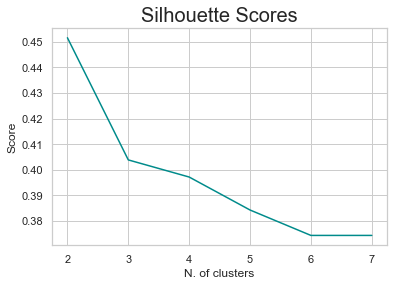

In [165]:
plt.errorbar(n_clusters, sils, yerr=sils_err,color='darkcyan')
plt.title("Silhouette Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")
plt.show()

Based on the above graph, the ideal number of clusters is 2.

#### <font color=pink> **Step 2: Clustering Process** </font>

In [166]:
model = Birch(branching_factor = 50, n_clusters = 2, threshold = 1.5) #number of cluster is 2 based on silhouette scores

In [167]:
model.fit(principal_df)

Birch(n_clusters=2, threshold=1.5)

In [168]:
pred = model.predict(principal_df)

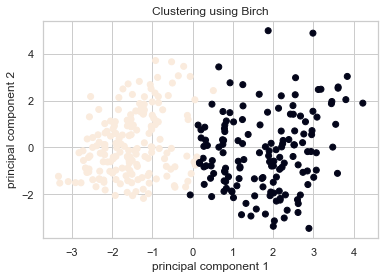

In [169]:
plt.scatter(principal_df['principal component 1'], principal_df['principal component 2'], c = pred)
plt.title('Clustering using Birch')
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.show()

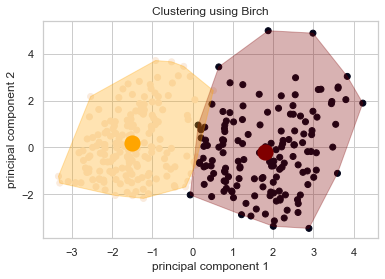

In [176]:
plt.scatter(principal_df['principal component 1'], principal_df['principal component 2'], c=pred)

# Define the colors for the clusters
cluster_colors = ['maroon', 'orange']

# Get unique cluster labels
unique_labels = np.unique(pred)

# Iterate over each cluster
for label in unique_labels:
    # Get data points belonging to the current cluster
    cluster_points = principal_df[pred == label][['principal component 1', 'principal component 2']]
    
    # Compute the convex hull of the cluster points
    hull = ConvexHull(cluster_points)
    
    # Get the outermost points of the convex hull
    outer_points = cluster_points.iloc[hull.vertices]
    
    # Close the shape by adding the first point to the end
    outer_points = outer_points.append(outer_points.iloc[0])
    
    # Plot the shape and fill the area
    plt.fill(outer_points['principal component 1'], outer_points['principal component 2'], alpha=0.3, color=cluster_colors[label])
    
    # Calculate the centroid of the current cluster
    centroid = cluster_points.mean()
    
    # Plot the centroid as a larger circular marker with the same cluster color
    plt.scatter(centroid[0], centroid[1], marker='o', s=200, linewidths=2, facecolors=cluster_colors[label])
    
plt.title('Clustering using Birch')
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.show()

#### <font color=pink> **Step 3: Calculating Metrics Coefficient** </font>

#### <font color=plum> **Silhouette Score** </font>

In [177]:
b_ss=silhouette_score(principal_df,labels=pred)
print(f'Silhouette Score(n=2): {b_ss}')

Silhouette Score(n=2): 0.44033264084758494


#### <font color=plum> **Calinski-Harabasz Index** </font>

In [178]:
ch_score_b = calinski_harabasz_score(principal_df, pred)
print("Calinski-Harabasz Index:", ch_score_b)

Calinski-Harabasz Index: 297.8820858073038


#### <font color=plum> **Davies-Bouldin Index** </font>

In [179]:
db_score_b = davies_bouldin_score(principal_df, pred)
print("Davies-Bouldin Index:", db_score_b)

Davies-Bouldin Index: 0.9293725789370144


### <font color=hotpink>d. Evaluation Metrics Comparison</font> 
The Silhouette Coefficient of a sample measures the average distance of a sample with all other points in the next nearest cluster against all other points in its cluster. A higher ratio signifies the cluster is far away from its nearest cluster and that the cluster is more well-defined.

Calinski-Harabasz Index measures the between-cluster dispersion against within-cluster dispersion. A higher score signifies better-defined clusters

The Davies-Bouldin Index measures the average similarity between clusters, where similarity compares the size of clusters against the between-cluster distance. A lower score means that the cluster is relatively small compared to the distance to another cluster, hence well-defined. 

In [180]:
metric=pd.DataFrame(data=[[km_ss,gmm_ss,b_ss],[ch_score_km,ch_score_ss,ch_score_b],
                          [db_score_km,db_score_ss,db_score_b]]).rename(columns={
    0:'K-means',1:'Gaussian Mixture',2:'Birch'
},index={0:'Silhouette',1:'Calinski',2:'Davies-Bouldin'})
metric

K-means  Gaussian Mixture       Birch
Silhouette        0.441397          0.431747    0.440333
Calinski        298.954544        288.262956  297.882086
Davies-Bouldin    0.927809          0.936331    0.929373

Based on highest silhouette value, highest calinski-harabasz index, and lowest davies-bouldin index, it can be deduced that the best clustering method for the variables is K-means clustering.

### <font color=hotpink>e. Best Clustering Result</font> 

In [181]:
Cluster = 'Cluster'
merged_df = pd.concat([pca_df, data_with_clusters[Cluster]], axis=1)
merged_df

age gender  height  weight  fastfood_consumed  sugary_drinks  \
0     21      0     170      60                2.0              0   
1     21      0     154      48                3.0              0   
2     20      0     153      48                3.0              0   
3     21      0     156      45                3.0              1   
4     20      0     168      55                2.0              1   
..   ...    ...     ...     ...                ...            ...   
324   21      1     168      64                4.0              1   
325   18      0     160      49                3.0              0   
326   18      0     162      58                2.0              3   
327   19      1     167      62                4.0              3   
328   21      1     176      67                6.0              1   

     fruits_vegetables  exercise  resting  smoking  alcohol_consumed  meals  \
0                    1       7.0        9        0               0.0    1.5   
1                    5       3.0        9        0               0.0    1.5   
2                    7       0.0        5        0               0.0    1.5   
3                    8       0.0        7        0               2.0    2.0   
4                    5       6.0       10        0               0.0    2.0   
..                 ...       ...      ...      ...               ...    ...   
324                  7       3.0        7        5               1.0    2.5   
325                  5       1.0        7        1               0.0    3.0   
326                  8       1.0        5        0               3.0    1.0   
327                 11       2.0        7        1               1.0    1.0   
328                  1       2.0        6        5               0.0    2.0   

     caffeinated_drinks  water_consumed vitamins  Cluster  
0                     2             2.5        0        1  
1                     2             7.0        1        0  
2                     0             3.0        1        0  
3                     5             1.0        1        0  
4                     1             3.0        1        0  
..                  ...             ...      ...      ...  
324                   3             3.0        0        1  
325                   0             3.0        0        0  
326                   1             3.0        0        0  
327                   1             3.0        1        0  
328                   4             4.0        1        1  

[329 rows x 16 columns]

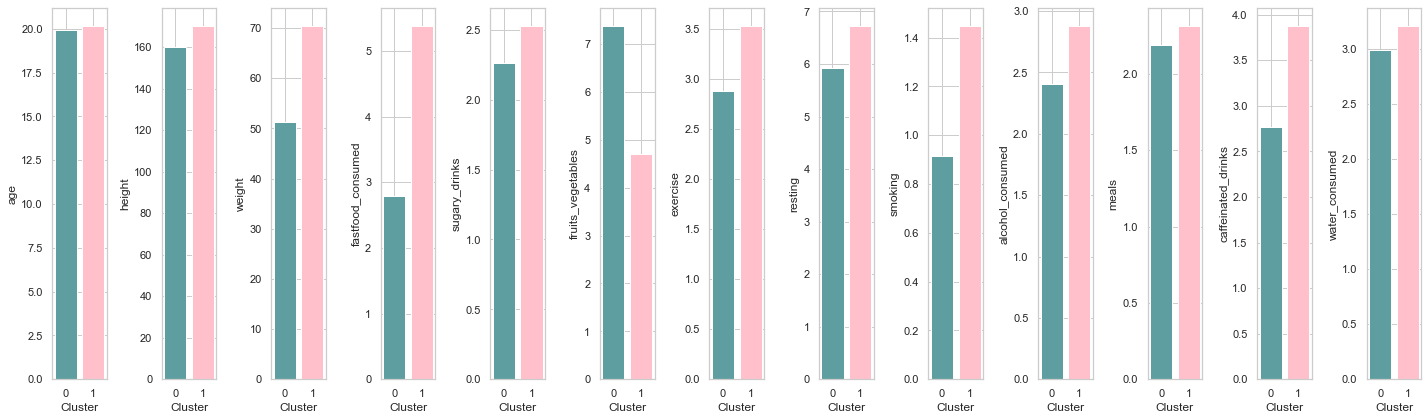

In [186]:
cluster_means = merged_df.groupby('Cluster').mean()
n_clusters = len(cluster_means)
fig, axes = plt.subplots(nrows=1, ncols=len(cluster_means.columns), figsize=(20, 6))

# Define the colors for the clusters
cluster_colors = ['cadetblue', 'pink']

for idx, column in enumerate(cluster_means.columns):
    ax = axes[idx]
    ax.bar(cluster_means.index, cluster_means[column], color=cluster_colors)
    ax.set_xlabel('Cluster')
    ax.set_ylabel(column)

plt.tight_layout()
plt.show()

In [187]:
df1=merged_df.copy()
df1['k_mean']=predicted_labels

In [188]:
df_overall=pd.DataFrame()
a = df1.describe().loc[['mean']].T
df_overall['Overall_Mean'] =  a['mean']

df_cluster_summary = df1.groupby('k_mean').describe().T.reset_index().rename(columns={'level_0': 'Column Name', 'level_1': 'Metrics'})
df_cluster_summary = df_cluster_summary[df_cluster_summary['Metrics'] == 'mean'].set_index('Column Name')

df_prof = df_cluster_summary.join(df_overall).reset_index()
df_prof.style.background_gradient(cmap='BuPu').hide_index()

based on the above graph, both clusters have similar age and height. However, there is a weight difference in cluster 1 as well as fast food and sugary drinks consumed. Cluster 1 tend to consume more amount of fast food as well as sugary drinks and caffeinated drink. They also eat less fruits and vegetables. They also spend more time smoking. Thus, have a higher weight. Nevertheless, cluster 1 have slightly higher exercise and resting time. 

0 represents healthy students while 1 represents unhealthy one. 